# Unravelling the Human Interaction with Generative AI-Based Decision Support in Healthcare

## Types of Chat Users When Having ChatGPT vs. a Human Expert as a Chat Partner

### CAS ADS Final Project by Mayra Spizzo

## Introduction

## Data Collection and Description


*   An experiment is conducted in which participants have to solve two patient cases (i.e., generate a diagnosis for a patient). Participants are split into two groups:
    * Group 1: chat with ChatGPT as a support to solve the patient case
    * Group 2: chat with a human expert (i.e., a physician) as a partner to solve the case

*   Participation:
    * possible for all medical students at the Charité Medical School in Berlin that are in the fourth year of their studies (invited to participate: 640 students)
    * at least 18 years old
    * have given their written consent for participation
    * data collection between 22 April, 2024 until 6 October, 2024

*   The medical students are given two diagnostic tasks that are presented in random order. The patient cases in each of the two diagnostic tasks are based on real emergency cases.

*   Participants are randomly assigned to one condition (i.e., either to the human expert or ChatGPT). To solve the diagnostic task, they can chat with their assigned assistant in real time (i.e., a human coach or ChatGPT). During the assignment, all clicks, noted differential diagnoses, and chat interactions are logged with timestamps

![Procedure](https://github.com/Mayra-N-S/CAS_ADS/blob/main/Final%20Project/Assignment/Procedure.jpg?raw=1)
![Chat Environment](https://github.com/Mayra-N-S/CAS_ADS/blob/main/Final%20Project/Assignment/ScreenshotChatroom.jpg?raw=1)


In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#import umap

## Descriptive Statistics

Based on the data collection process, the following data for each participant is collected:
*   duration of the exchange with the expert (for both ChatGPT and human expert)
*   number of interactions with respective expert
*   categorization of interaction (technical question, request, statement, diagnosis exclusion)
*   patient background info reviewed by the med student



In [2]:
# load data
url = "https://raw.githubusercontent.com/Mayra-N-S/CAS_ADS/main/Final%20Project/Assignment/data_emergency_medicine.csv"
df = pd.read_csv(url, sep=';')
df2 = pd.read_csv(url, sep=';')

In [3]:
# overview of variables in the data set
df.info()

# Check for NA in variables
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          188 non-null    int64  
 1   Count                       188 non-null    int64  
 2   SessionId                   188 non-null    int64  
 3   Chat                        188 non-null    object 
 4   ParticipantId               188 non-null    object 
 5   Condition                   188 non-null    object 
 6   CaseTrue                    188 non-null    int64  
 7   Patienthistory              188 non-null    int64  
 8   Patientfindings             188 non-null    int64  
 9   Patientlab                  188 non-null    int64  
 10  Patientbildgebung           188 non-null    int64  
 11  Patientekg                  188 non-null    int64  
 12  Patientimage2               188 non-null    int64  
 13  AmountPatient               188 non

,0
Id,0
Count,0
SessionId,0
Chat,0
ParticipantId,0
Condition,0
CaseTrue,0
Patienthistory,0
Patientfindings,0
Patientlab,0


Variables for which *NA* can be ignored and the reason or it, respectively:


*   CalculateTimePatient: This variable was used to claculate the time variable for certain participant and is not used for the analysis of the data
*   FirstQuestionSelf: *NA* can remain, since they occur in chats, in which the participant did not interact in the chat, i.e. there was no first message by the participant (which can also be observed by the variable AmountInteraction). These data points will be excluded in the next steps

Variables for which *NAs* are set to *0* because *NA* indicate in these variables that there was no section coded for this variable in the chat data:



*   TechnicalQuestion
*   Request
*   Statement
*   Differentiate
*   Exclude
*   SupportDiagnostics
*   SupportManagement
*   Other
*   AmountDiagnosesMentioned
*   AmountDiagnosesExcluded















In [4]:
# clean the data set
# rename column "Spalte2"
df.rename(columns={'Spalte2': 'CalculationTimePatient'}, inplace=True)
df2.rename(columns={'Spalte2': 'CalculationTimePatient'}, inplace=True)

# delete column "Unnamed: 35"
df = df.drop(columns=['Unnamed: 35'])
df2 = df2.drop(columns=['Unnamed: 35'])

In [5]:
# set NA in the mentioned columns above to 0
df['TechnicalQuestion'] = df['TechnicalQuestion'].fillna(0)
df['Request'] = df['Request'].fillna(0)
df['Statement'] = df['Statement'].fillna(0)
df['Differentiate'] = df['Differentiate'].fillna(0)
df['Exclude'] = df['Exclude'].fillna(0)
df['SupportDiagnostics'] = df['SupportDiagnostics'].fillna(0)
df['SupportManagement'] = df['SupportManagement'].fillna(0)
df['Other'] = df['Other'].fillna(0)
df['AmountDiagnosesMentioned'] = df['AmountDiagnosesMentioned'].fillna(0)
df['AmountDiagnosesExcluded'] = df['AmountDiagnosesExcluded'].fillna(0)

In [6]:
df2['TechnicalQuestion'] = df2['TechnicalQuestion'].fillna(0)
df2['Request'] = df2['Request'].fillna(0)
df2['Statement'] = df2['Statement'].fillna(0)
df2['Differentiate'] = df2['Differentiate'].fillna(0)
df2['Exclude'] = df2['Exclude'].fillna(0)
df2['SupportDiagnostics'] = df2['SupportDiagnostics'].fillna(0)
df2['SupportManagement'] = df2['SupportManagement'].fillna(0)
df2['Other'] = df2['Other'].fillna(0)
df2['AmountDiagnosesMentioned'] = df2['AmountDiagnosesMentioned'].fillna(0)
df2['AmountDiagnosesExcluded'] = df2['AmountDiagnosesExcluded'].fillna(0)

In [19]:
# Check if change for NA in variables worked
df.isna().sum()
df2.isna().sum()

,0
Id,0
Count,0
SessionId,0
Chat,0
ParticipantId,0
Condition,0
CaseTrue,0
Patienthistory,0
Patientfindings,0
Patientlab,0


In [8]:
# exclude data points where participants did not interact with their assistant and therefore, where no chat data is available
# delete data points with NA in the variable FirstQuestionSelf
df = df.dropna(subset=['FirstQuestionSelf'])
df2 = df2.dropna(subset=['FirstQuestionSelf'])

In [9]:
# check if it worked
# amount of data points in the data set
print(len(df))
print(len(df2))
# it worked, there are now 184 data points, 4 were excluded, previousely the data set comprised 188 data points

184
184


In [10]:
# data set overview
#get variables
n_participants = df2['Count'].nunique()
human_interaction = df2['Condition'].value_counts()['Human']
gpt_interaction = df2['Condition'].value_counts()['GPT']
time_per_patient = df2['TimePatientSeconds'].mean()
time_per_patient_human = df2[df2['Condition'] == 'Human']['TimePatientSeconds'].mean()
time_per_patient_gpt = df2[df2['Condition'] == 'GPT']['TimePatientSeconds'].mean()
amount_interaction = df2['AmountInteraction'].mean()
amount_interaction_gpt = df2[df2['Condition'] == 'GPT']['AmountInteraction'].mean()
amount_interaction_human = df2[df2['Condition'] == 'Human']['AmountInteraction'].mean()
amount_patient_ratio = df2['AmountPatientRatio'].mean()


In [11]:
from IPython.display import Markdown, display

table_md = f"""

| Variable             | Observations|
|-------------------------|-------|
|Number of participants | {n_participants} |
|Human interactions | {human_interaction} |
|GPT interactions| {gpt_interaction} |
|Average time per patient (seconds)| {round(time_per_patient)} |
|Average time per patient - Human (seconds)| {round(time_per_patient_human)} |
|Average time per patient - GPT (seconds)| {round(time_per_patient_gpt)} |
|Average amount of interaction| {round(amount_interaction)} |
|Average amount of interaction - Human| {round(amount_interaction_human)} |
|Average amount of interaction - GPT | {round(amount_interaction_gpt)} |
|Patient information viewed by medical student | {round(amount_patient_ratio,2)} |

"""
# Display Table
display(Markdown(table_md))



| Variable             | Observations|
|-------------------------|-------|
|Number of participants | 184 |
|Human interactions | 93 |
|GPT interactions| 91 |
|Average time per patient (seconds)| 269 |
|Average time per patient - Human (seconds)| 279 |
|Average time per patient - GPT (seconds)| 259 |
|Average amount of interaction| 19 |
|Average amount of interaction - Human| 23 |
|Average amount of interaction - GPT | 14 |
|Patient information viewed by medical student | 0.85 |



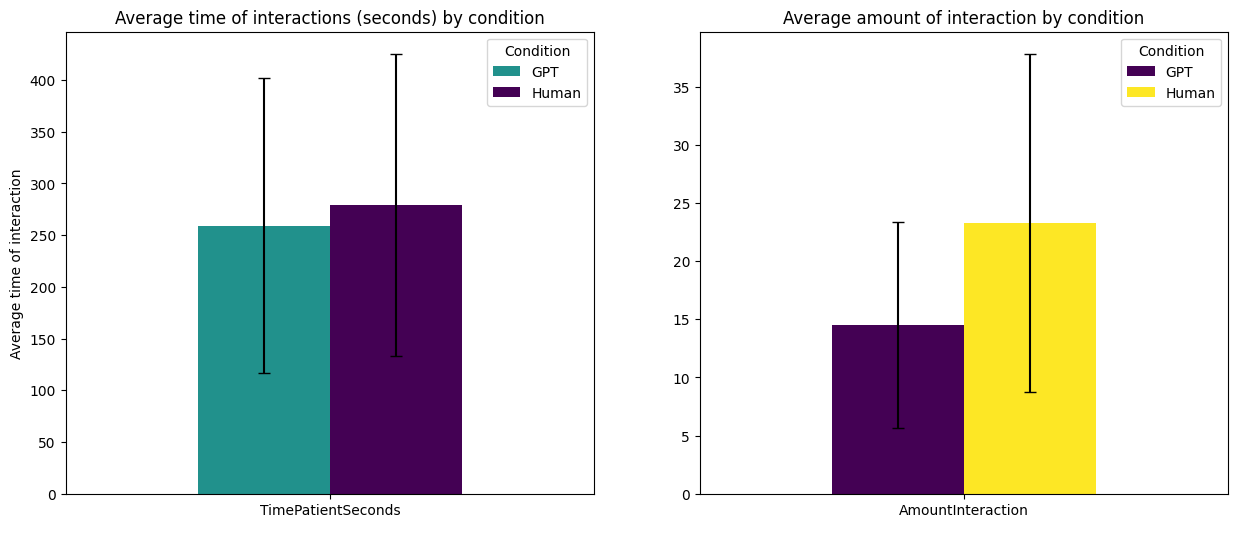

In [12]:
df = pd.DataFrame(df2)

# Selecting columns and computing the means and standard deviations
selected_columns_time = ['TimePatientSeconds', 'Condition']  # Replace with desired column names
selected_columns_interaction = ['AmountInteraction', 'Condition']  # Replace with desired column names

average_time = df[selected_columns_time]
average_interaction = df[selected_columns_interaction]

# Group by 'Condition' and calculate mean and standard deviation
grouped_average_time = average_time.groupby('Condition').mean()
grouped_std_time = average_time.groupby('Condition').std()  # Standard deviation for time

grouped_average_interaction = average_interaction.groupby('Condition').mean()
grouped_std_interaction = average_interaction.groupby('Condition').std()  # Standard deviation for interaction

# Transpose the data to have categories on x-axis
grouped_average_time = grouped_average_time.T
grouped_std_time = grouped_std_time.T  # Transpose standard deviation for time

grouped_average_interaction = grouped_average_interaction.T
grouped_std_interaction = grouped_std_interaction.T  # Transpose standard deviation for interaction

# Plotting side by side with error bars
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First plot: Average time of interactions with error bars
grouped_average_time.plot(kind='bar', yerr=grouped_std_time, ax=axes[0], capsize=4, legend=True, cmap=ListedColormap(['#21918c', '#440154']))
axes[0].set_title('Average time of interactions (seconds) by condition')
axes[0].set_xlabel(' ')
axes[0].set_ylabel('Average time of interaction')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Condition')

# Second plot: Average amount of interaction with error bars
grouped_average_interaction.plot(kind='bar', yerr=grouped_std_interaction, ax=axes[1], capsize=4, legend=True, cmap='viridis')
axes[1].set_title('Average amount of interaction by condition')
axes[1].set_xlabel(' ')
axes[1].tick_params(axis='x', rotation=0)



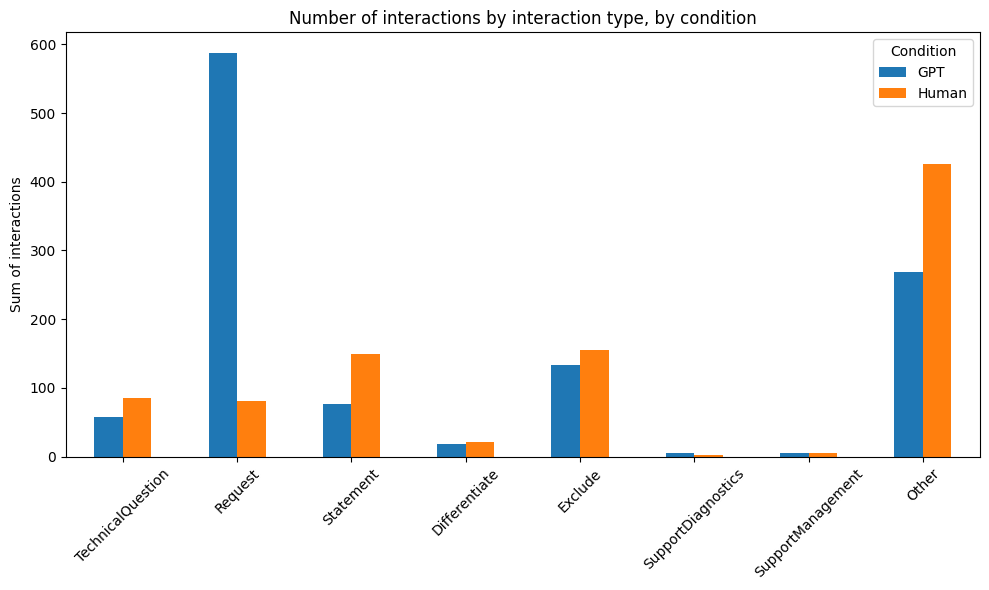

In [89]:
#df = pd.DataFrame(df2)
selected_columns = ['Condition','TechnicalQuestion', 'Request', 'Statement', 'Differentiate', 'Exclude', 'SupportDiagnostics', 'SupportManagement','Other']  # Replace with desired column names

sum_replies = df[selected_columns]

grouped_sum = sum_replies.groupby('Condition').sum()
# Transpose the data to have categories on x-axis and genders as separate bars
grouped_sum = grouped_sum.T  # Transpose so categories are on x-axis

# Plotting
grouped_sum.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Number of interactions by interaction type, by condition')
plt.xlabel('')
plt.ylabel('Sum of interactions')
plt.xticks(rotation=45)
plt.legend(title='Condition')
plt.tight_layout()

# Show the plot
plt.show()




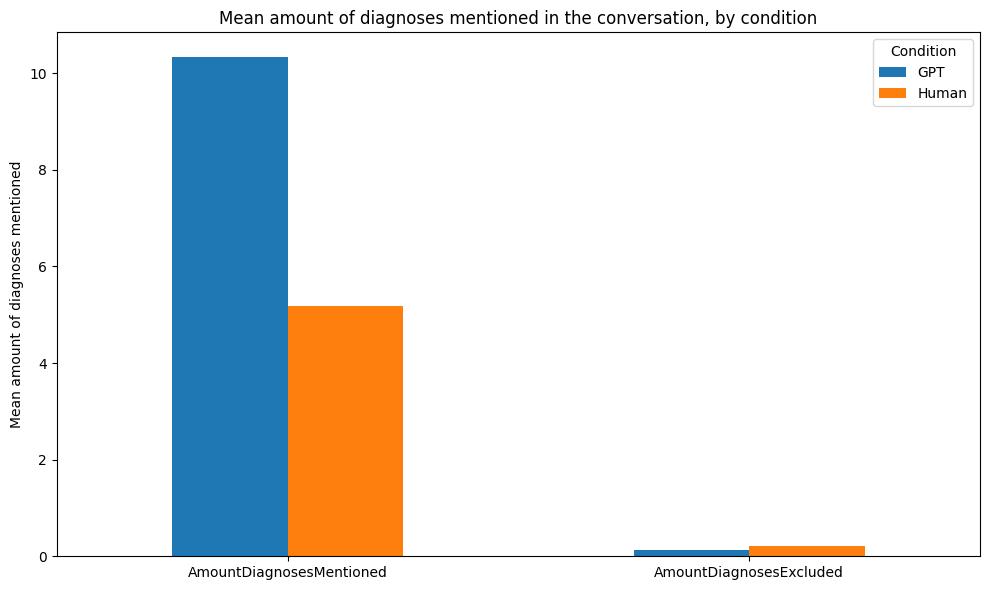

In [14]:
selected_columns = ['Condition','AmountDiagnosesMentioned', 'AmountDiagnosesExcluded']  # Replace with desired column names

sum_replies = df[selected_columns]
grouped_sum = sum_replies.groupby('Condition').mean()
# Transpose the data to have categories on x-axis and genders as separate bars
grouped_sum = grouped_sum.T  # Transpose so categories are on x-axis

# Plotting
grouped_sum.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Mean amount of diagnoses mentioned in the conversation, by condition')
plt.xlabel('')
plt.ylabel('Mean amount of diagnoses mentioned')
plt.xticks(rotation=0)
plt.legend(title='Condition')
plt.tight_layout()

# Show the plot
plt.show()


## Unsupervised Machine Learning Methods

### K-means

In [15]:
#libraries
import numpy as np
from sklearn.cluster import KMeans

In [16]:
#Create a dataframe with the necessary variables
clustering_df = df[['Count', 'Condition', 'AmountPatientRatio', 'TimePatientSeconds', 'TechnicalQuestion', 'Request', 'Statement', 'Differentiate', 'Exclude', 'SupportDiagnostics', 'SupportManagement', 'FirstQuestionSelf', 'AmountDiagnosesMentioned', 'AmountDiagnosesExcluded', 'DurationInteractionSeconds', 'AmountInteraction']]

#Create a binary column for the variable 'Condition'
#1 = ChatGPT, 0 = Human expert
clustering_df['Condition'] = clustering_df['Condition'].apply(lambda x: 1 if x == "GPT" else 0)

print(clustering_df)

     Count  Condition  AmountPatientRatio  TimePatientSeconds  \
0        1          1            1.000000                 202   
1        2          1            1.000000                 114   
2        3          1            0.166667                 191   
3        4          1            0.166667                 104   
4        5          0            0.166667                 111   
..     ...        ...                 ...                 ...   
183    185          1            0.833333                 408   
184    186          0            1.000000                 279   
185    187          0            1.000000                 183   
186    188          0            1.000000                  95   
187    189          0            1.000000                  93   

     TechnicalQuestion  Request  Statement  Differentiate  Exclude  \
0                  2.0      0.0        0.0            0.0      2.0   
1                  1.0      0.0        0.0            0.0      1.0   
2        

/tmp/ipython-input-16-2103215136.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['Condition'] = clustering_df['Condition'].apply(lambda x: 1 if x == "GPT" else 0)


In [20]:
#Create two subsets for each condition
clustering_gpt = clustering_df[clustering_df['Condition'] == 1]
clustering_human = clustering_df[clustering_df['Condition'] == 0]

#Check if it worked
clustering_gpt.head()
clustering_human.head()

,Count,Condition,AmountPatientRatio,TimePatientSeconds,TechnicalQuestion,Request,Statement,Differentiate,Exclude,SupportDiagnostics,SupportManagement,FirstQuestionSelf,AmountDiagnosesMentioned,AmountDiagnosesExcluded,DurationInteractionSeconds,AmountInteraction
4,5,0,0.166667,111,0.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,7.0,1.0,1041,28
5,6,0,0.333333,205,0.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,731,28
6,7,0,0.500000,201,0.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,3.0,0.0,1183,28
7,8,0,0.833333,182,1.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,2.0,0.0,651,15
10,11,0,0.833333,464,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,695,6


In [21]:
#Check if tehre are missing values in the data frames
print(clustering_df.isna().sum())

print(clustering_gpt.isna().sum())
print(clustering_human.isna().sum())
#No, there are no missing values left


Count                         0
Condition                     0
AmountPatientRatio            0
TimePatientSeconds            0
TechnicalQuestion             0
Request                       0
Statement                     0
Differentiate                 0
Exclude                       0
SupportDiagnostics            0
SupportManagement             0
FirstQuestionSelf             0
AmountDiagnosesMentioned      0
AmountDiagnosesExcluded       0
DurationInteractionSeconds    0
AmountInteraction             0
dtype: int64
Count                         0
Condition                     0
AmountPatientRatio            0
TimePatientSeconds            0
TechnicalQuestion             0
Request                       0
Statement                     0
Differentiate                 0
Exclude                       0
SupportDiagnostics            0
SupportManagement             0
FirstQuestionSelf             0
AmountDiagnosesMentioned      0
AmountDiagnosesExcluded       0
DurationInteractionSeconds 

#### PCA Version

Apply a PCA to reduce the dimensionality:

In [275]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(clustering_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [276]:
#import umap-learn #Löschen

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values with 0
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
clustering_df_imputed = imputer.fit_transform(clustering_df)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(clustering_df_imputed)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [317]:
# Calculate explained variance ratio for PCA
# Assuming 'pca' object from the previous PCA step is available
if 'pca' in globals():
    explained_variance_ratio = pca.explained_variance_ratio_
    print("\nExplained Variance Ratio for Principal Components:")
    print(f"Principal Component 1: {explained_variance_ratio[0]:.4f}")
    print(f"Principal Component 2: {explained_variance_ratio[1]:.4f}")
else:
    print("\nPCA was not performed. Cannot calculate explained variance ratio for principal components.")


Explained Variance Ratio for Principal Components:
Principal Component 1: 0.8188
Principal Component 2: 0.1461


Use of the elbow method to find the optimal number of clusters:

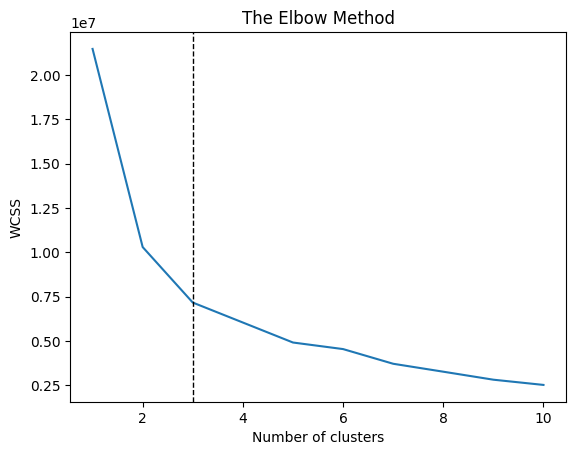

In [277]:
# K-Means++ initialization for the elbow method:
# Instead of randomly placing centroids, K-Means++ selects them strategically:
# 1. The first centroid is chosen randomly from the data points.
# 2. For each remaining centroid, the algorithm selects a point farthest from the existing centroids.
#    This spreads out the centroids across the dataset.
# 3. After initializing the centroids, K-Means proceeds with clustering as usual.
# K-Means++ improves the clustering efficiency and helps get better results when using techniques
# like the Elbow Method to find the optimal number of clusters.
wcss = []
for i in range(1, 11): # we'll do it for 10 clusters to find the optimal number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clustering_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x = 3, linewidth = 1, color = 'black', linestyle = '--')
plt.show()

The optimal number of clusters is **3**. We can see visually that with a number of clusters of 3, the descent of the WCSS value is reducing its descent.

Use of the average silhouette score method to find the optimal number of clusters:

In [278]:
# This method uses the mean of the silhouette coefficient
# It uses the mean distance to the other instances in the same cluster

# import library
from sklearn.metrics import silhouette_score

In [279]:
silhouette_score(clustering_df, kmeans.labels_)

np.float64(0.3108466932163925)

In [280]:
# Create a list of hypothetical scenarios for different number of clusters
# We'll do it again for 10 clusters to find the optimal number of clusters
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(clustering_df) for k in range (1,10)]

silhouette_scores = [silhouette_score(clustering_df, model.labels_)
                      for model in kmeans_per_k[1:]]

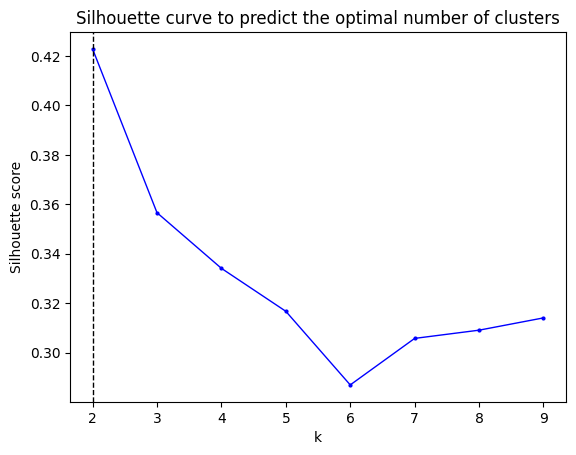

In [281]:
# Plot the silhouette scores graph
#rcParams['figure.figsize'] = 16, 5
plt.plot(range(2, 10), silhouette_scores, 'bo-',
             linewidth = 1, markersize = 2, label = 'Silhouette curve')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette curve to predict the optimal number of clusters')

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scores) + 2

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = k, linewidth = 1, color = 'black', linestyle = '--')

plt.show()

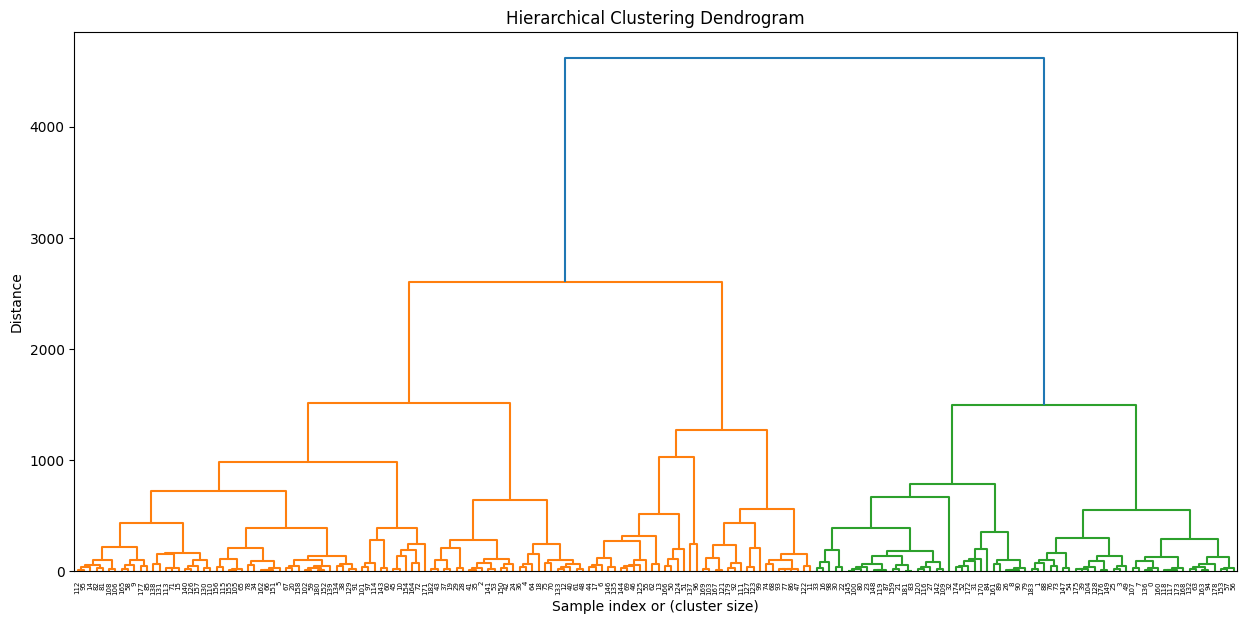

In [304]:
# add a dendogram

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Select the columns you want to use for the dendrogram
# Make sure to exclude non-numeric columns like 'Condition' and 'Count'
# Also, ensure the data is imputed or handled for missing values before linking
dendrogram_data = clustering_df.drop(columns=['Count'])

# Perform hierarchical clustering using Ward's method
linked = linkage(dendrogram_data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()


In [315]:
print("WCSS (Inertia) scores for each number of clusters (1-10):")
print(wcss)

WCSS (Inertia) scores for each number of clusters (1-10):
[21462483.98294082, 10292139.554484524, 7163556.217106992, 6037673.330203469, 4911084.946961443, 4540882.175205293, 3713426.356102808, 3266024.145879654, 2814965.6681482173, 2520507.404759596]

Explained Variance Ratio for Principal Components:
Principal Component 1: 0.8188
Principal Component 2: 0.1461


Let's now train the model with this number of clusters:

In [282]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clustering_df)

Explanation of y_kmeans:

The y_kmeans variable contains the classification in a cluster of the participant / user.

For example, participant 1 is in cluster 2, participant 2 is in cluster 3 and participant 3 is in cluster 2.

In [283]:
#print(clustering_df.head())
y_kmeans

array([1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 2,
       2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2,
       2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 0, 1, 2, 1, 2], dtype=int32)

#### Visualization of the results

In a next step, let's visualize the clusters:

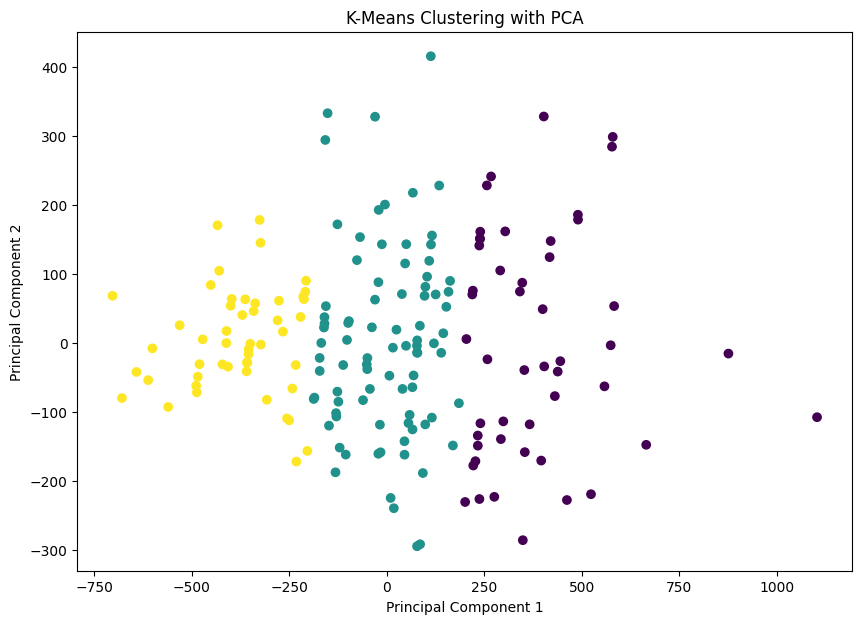

In [284]:
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()

In [316]:
silhouette_avg = silhouette_score(clustering_df, labels)
print("Silhouette Score:", silhouette_avg)


# Calculate inertia for each cluster
# We can access the inertia for the entire clustering, but not directly for each cluster from the KMeans object
# So, we'll calculate it manually for each cluster
inertia_per_cluster = []
for i in range(kmeans.n_clusters):
    cluster_data = clustering_df[y_kmeans == i]
    inertia = ((cluster_data - kmeans.cluster_centers_[i])**2).sum().sum()
    inertia_per_cluster.append(inertia)

print("Inertia (WCSS) for each cluster:")
for i, inertia in enumerate(inertia_per_cluster):
    print(f"Cluster {i}: {inertia:.2f}")

Silhouette Score: 0.35661252525784326
Inertia (WCSS) for each cluster:
Cluster 0: 2878555.17
Cluster 1: 2805423.53
Cluster 2: 1479577.51


To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:

In [289]:
# Group the data by cluster and calculate the mean of each feature
clustering_df = pd.DataFrame(clustering_df, columns=clustering_df.columns)
clustering_df['cluster'] = y_kmeans
df_grouped = clustering_df.groupby('cluster').mean()

#Filter the DataFrame for each cluster
cluster1_data = clustering_df[clustering_df['cluster'] == 0]
cluster2_data = clustering_df[clustering_df['cluster'] == 1]
cluster3_data = clustering_df[clustering_df['cluster'] == 2]
cluster4_data = clustering_df[clustering_df['cluster'] == 3]

#Calculate the mean of each feature for each cluster
cluster1_mean = cluster1_data.mean()
cluster2_mean = cluster2_data.mean()
cluster3_mean = cluster3_data.mean()
cluster4_mean = cluster4_data.mean()

#Calculate the standard deviation of each feature for each cluster
cluster1_std = cluster1_data.std()
cluster2_std = cluster2_data.std()
cluster3_std = cluster3_data.std()
cluster4_std = cluster4_data.std()

# Create a Markdown table string
table_md1 = f"""
| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | Mean value for cluster 4 |
|---|---|---|---|---|
| Condition | **{cluster1_mean['Condition']:.2f}** ({cluster1_std['Condition']:.2f}) | {cluster2_mean['Condition']:.2f} | **{cluster3_mean['Condition']:.2f}** | {cluster4_mean['Condition']:.2f} |
| Ratio of patient information | {cluster1_mean['AmountPatientRatio']:.2f} | **{cluster2_mean['AmountPatientRatio']:.2f}** | {cluster3_mean['AmountPatientRatio']:.2f} | **{cluster4_mean['AmountPatientRatio']:.2f}** |
| Time of patient information (in seconds) | {cluster1_mean['TimePatientSeconds']:.2f} | **{cluster2_mean['TimePatientSeconds']:.2f}** | {cluster3_mean['TimePatientSeconds']:.2f} | **{cluster4_mean['TimePatientSeconds']:.2f}** |
| Q-type: Technical question | {cluster1_mean['TechnicalQuestion']:.2f} | {cluster2_mean['TechnicalQuestion']:.2f} | **{cluster3_mean['TechnicalQuestion']:.2f}** | {cluster4_mean['TechnicalQuestion']:.2f} |
| Q-type: Request | {cluster1_mean['Request']:.2f} | **{cluster2_mean['Request']:.2f}** | {cluster3_mean['Request']:.2f} | {cluster4_mean['Request']:.2f} |
| Q-type: Statement | {cluster1_mean['Statement']:.2f} | {cluster2_mean['Statement']:.2f} | **{cluster3_mean['Statement']:.2f}** | {cluster4_mean['Statement']:.2f} |
| Q-type: Differentiate | {cluster1_mean['Differentiate']:.2f} | {cluster2_mean['Differentiate']:.2f} | {cluster3_mean['Differentiate']:.2f} | **{cluster4_mean['Differentiate']:.2f}** |
| Q-type: Exclude | {cluster1_mean['Exclude']:.2f} | {cluster2_mean['Exclude']:.2f} | **{cluster3_mean['Exclude']:.2f}** | {cluster4_mean['Exclude']:.2f} |
| Q-type: Support diagnostics | {cluster1_mean['SupportDiagnostics']:.2f} | {cluster2_mean['SupportDiagnostics']:.2f} | **{cluster3_mean['SupportDiagnostics']:.2f}** | {cluster4_mean['SupportDiagnostics']:.2f} |
| Q-type: Support management | {cluster1_mean['SupportManagement']:.2f} | {cluster2_mean['SupportManagement']:.2f} | **{cluster3_mean['SupportManagement']:.2f}** | {cluster4_mean['SupportManagement']:.2f} |
| First question was self-formulated (and not copied) | {cluster1_mean['FirstQuestionSelf']:.2f} | {cluster2_mean['FirstQuestionSelf']:.2f} | {cluster3_mean['FirstQuestionSelf']:.2f} | {cluster4_mean['FirstQuestionSelf']:.2f} |
| Amount of mentioned diagnoses | **{cluster1_mean['AmountDiagnosesMentioned']:.2f}** | **{cluster2_mean['AmountDiagnosesMentioned']:.2f}** | {cluster3_mean['AmountDiagnosesMentioned']:.2f} | {cluster4_mean['AmountDiagnosesMentioned']:.2f} |
| Amount of excluded diagnoses | **{cluster1_mean['AmountDiagnosesExcluded']:.2f}** | **{cluster2_mean['AmountDiagnosesExcluded']:.2f}** | {cluster3_mean['AmountDiagnosesExcluded']:.2f} | {cluster4_mean['AmountDiagnosesExcluded']:.2f} |
| Duration of the total chat interaction (in seconds) | **{cluster1_mean['DurationInteractionSeconds']:.2f}** | {cluster2_mean['DurationInteractionSeconds']:.2f} | **{cluster3_mean['DurationInteractionSeconds']:.2f}** | {cluster4_mean['DurationInteractionSeconds']:.2f} |
| Amount of interactions in the chat | **{cluster1_mean['AmountInteraction']:.2f}** | {cluster2_mean['AmountInteraction']:.2f} | **{cluster3_mean['AmountInteraction']:.2f}** | {cluster4_mean['AmountInteraction']:.2f} |
"""

# Display Table
display(Markdown(table_md1))


| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | Mean value for cluster 4 |
|---|---|---|---|---|
| Condition | **0.24**  (0.43) | 0.48 | **0.78** | nan |
| Ratio of patient information | 0.87 | **0.84** | 0.85 | **nan** |
| Time of patient information (in seconds) | 353.06 | **268.45** | 186.96 | **nan** |
| Q-type: Technical question | 1.18 | 0.72 | **0.47** | nan |
| Q-type: Request | 1.22 | **1.00** | 10.67 | nan |
| Q-type: Statement | 2.08 | 1.27 | **0.33** | nan |
| Q-type: Differentiate | 0.31 | 0.20 | 0.16 | **nan** |
| Q-type: Exclude | 1.94 | 1.79 | **0.82** | nan |
| Q-type: Support diagnostics | 0.08 | 0.05 | **0.00** | nan |
| Q-type: Support management | 0.14 | 0.06 | **0.00** | nan |
| First question was self-formulated (and not copied) | 0.90 | 0.86 | 0.82 | nan |
| Amount of mentioned diagnoses | **9.00** | **8.38** | 5.31 | nan |
| Amount of excluded diagnoses | **0.20** | **0.23** | 0.02 | nan |
| Duration of the total chat interaction (in seconds) | **1135.35** | 760.08 | **390.10** | nan |
| Amount of interactions in the chat | **28.61** | 19.55 | **8.20** | nan |


#### Interpretation

TBD

* Cluster 1 - Quickies (or low intensity chat user)
    * The group that did use the chat the least (lowest duration of chat interaction and amount of chat interactions among all clusters)
    * Subsequently, the group that generated the lowest amount of differential diagnoses

* Cluster 2 - Generate me solutions, please! (or low informer and high requester)
    * The group that contains users who did not inform themselves before interacting in the chat (lowest values for ratio and time of patient information acquisition prior to entering the chat)
    * During the interaction they request the generation of diagnoses (highest value for Q-type: Request) to have a palette of diagnoses (highest amount of generated diagnoses among all clusters)

* Cluster 3 - Novice chatterbox (or high intensity chat user with low expert knowledge in the medical field)
    * The group that did use the chat the most (highest duration of chat interaction and amount of chat interactions among all clusters)
    * In the chat interaction, they mostly ask technical questions to close their knowledge gap (highest value for Q-type: Technical question). They also make the most statements (highest value for Q-type: Statement), but this is probably because of additional information or the interaction for the technical questions.
    * They also asked the most questions to exclude diagnoses (highest value for Q-type: Exclude). The information gained from the technical questions could possibly be used to then exclude diagnoses they thought of.

* Cluster 4 - Help me to get my ideas straight (or high informer and high differentiater)
    * The group with users who did inform themselves a lot about the patient case before interacting in the chat (highest values for ratio and time of patient information acquisition prior to entering the chat)
    * With this, they built themselves an image about the situation and had already a list of diagnoses in mind. Then, during the chat interaction, they asked questions to differentiate multiple diagnoses from each other (highest value for Q-type: Differentiate)


Condition ChatGPT vs. Human expert
* It is noticeable that cluster 1 and 2 contain participants who had in a majority ChatGPT as their interaction partner and cluster 3 and 4, on the other hand, contain mostly participants with a human expert as their chat partner.
* The clusters seem to differentiate between the conditions. Therefore, it makes sense to do an additonal clustering for each condition separately and to compare the results.

#### UMAP Version

In [322]:
import umap.umap_ as umap
from sklearn.impute import SimpleImputer
import numpy as np

# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_df)
principalDf = pd.DataFrame(data = embedding, columns = ['umap component 1', 'umap component 2'])

In [334]:
# Calculate explained variance ratio for UMAP
# 'embedding' object from the previous UMAP step is available
if 'reducer' in globals():
    explained_variance_ratio = pca.explained_variance_ratio_
    print("\nExplained Variance Ratio for Principal Components:")
    print(f"Principal Component 1: {explained_variance_ratio[0]:.4f}")
    print(f"Principal Component 2: {explained_variance_ratio[1]:.4f}")
else:
    print("\nPCA was not performed. Cannot calculate explained variance ratio for principal components.")


Explained Variance Ratio for Principal Components:
Principal Component 1: 0.8188
Principal Component 2: 0.1461


Use of the elbow method to find the optimal number of clusters:

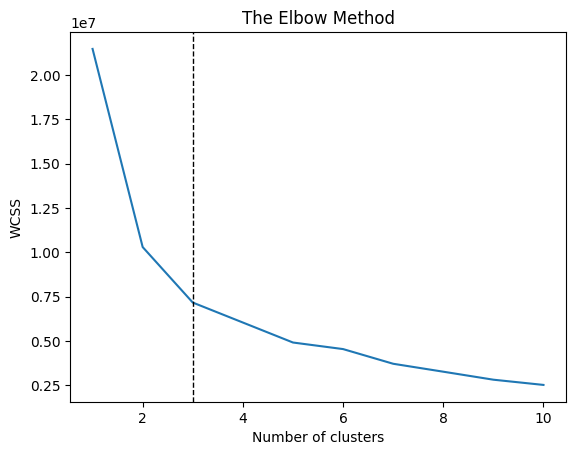

In [35]:
# K-Means++ initialization for the elbow method:
# Instead of randomly placing centroids, K-Means++ selects them strategically:
# 1. The first centroid is chosen randomly from the data points.
# 2. For each remaining centroid, the algorithm selects a point farthest from the existing centroids.
#    This spreads out the centroids across the dataset.
# 3. After initializing the centroids, K-Means proceeds with clustering as usual.
# K-Means++ improves the clustering efficiency and helps get better results when using techniques
# like the Elbow Method to find the optimal number of clusters.
wcss = []
for i in range(1, 11): # we'll do it for 10 clusters to find the optimal number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clustering_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x = 3, linewidth = 1, color = 'black', linestyle = '--')
plt.show()

The optimal number of clusters is **3**. We can see visually that with a number of clusters of 3, the descent of the WCSS value is reducing its descent.

Use of the average silhouette score method to find the optimal number of clusters:

In [36]:
# Create a list of hypothetical scenarios for different number of clusters
# We'll do it again for 10 clusters to find the optimal number of clusters
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(clustering_df) for k in range (1,10)]

silhouette_scores = [silhouette_score(clustering_df, model.labels_)
                      for model in kmeans_per_k[1:]]

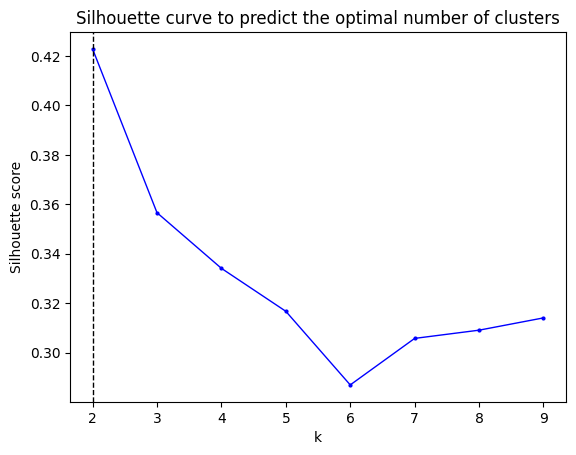

In [37]:
# Plot the silhouette scores graph
#rcParams['figure.figsize'] = 16, 5
plt.plot(range(2, 10), silhouette_scores, 'bo-',
             linewidth = 1, markersize = 2, label = 'Silhouette curve')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette curve to predict the optimal number of clusters')

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scores) + 2

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = k, linewidth = 1, color = 'black', linestyle = '--')

plt.show()

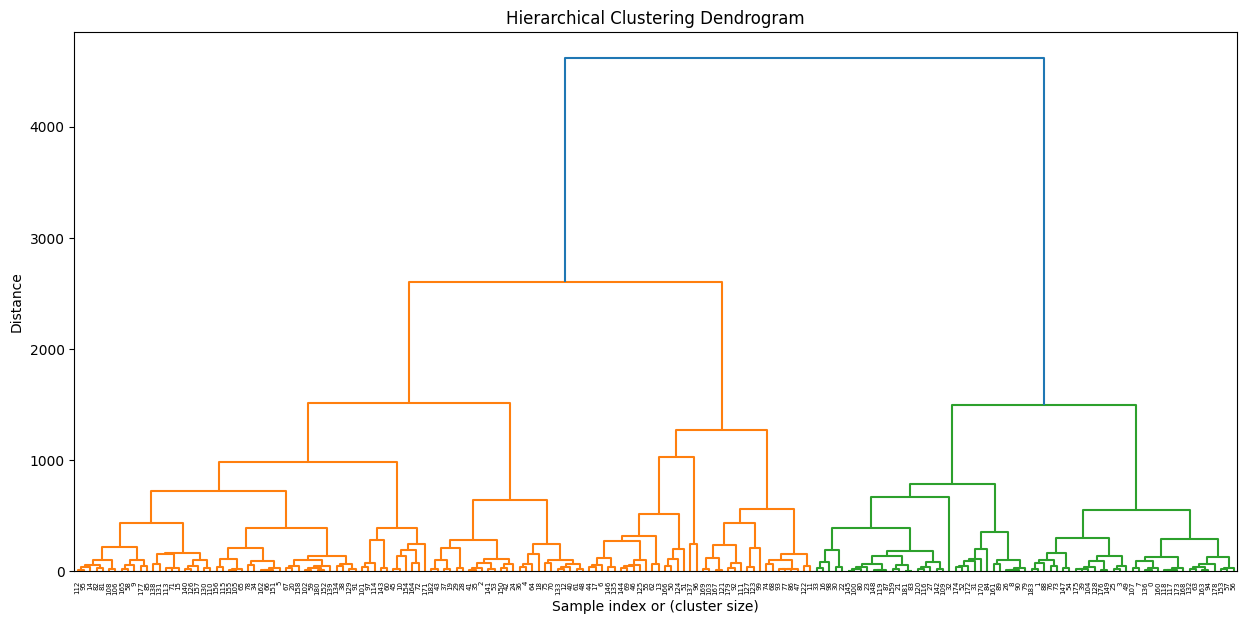

In [305]:
# add a dendogram

# Select the columns you want to use for the dendrogram
# Make sure to exclude non-numeric columns like 'Condition' and 'Count'
# Also, ensure the data is imputed or handled for missing values before linking
dendrogram_data = clustering_df.drop(columns=['Count'])

# Perform hierarchical clustering using Ward's method
linked = linkage(dendrogram_data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

In [329]:
print("WCSS (Inertia) scores for each number of clusters (1-10):")
print(wcss)

WCSS (Inertia) scores for each number of clusters (1-10):
[21462483.98294082, 10292139.554484524, 7163556.217106992, 6037673.330203469, 4911084.946961443, 4540882.175205293, 3713426.356102808, 3266024.145879654, 2814965.6681482173, 2520507.404759596]


Let's now train the model with this number of clusters:

In [42]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clustering_df)

#### Visualization of the results

In a next step, let's visualize the clusters:

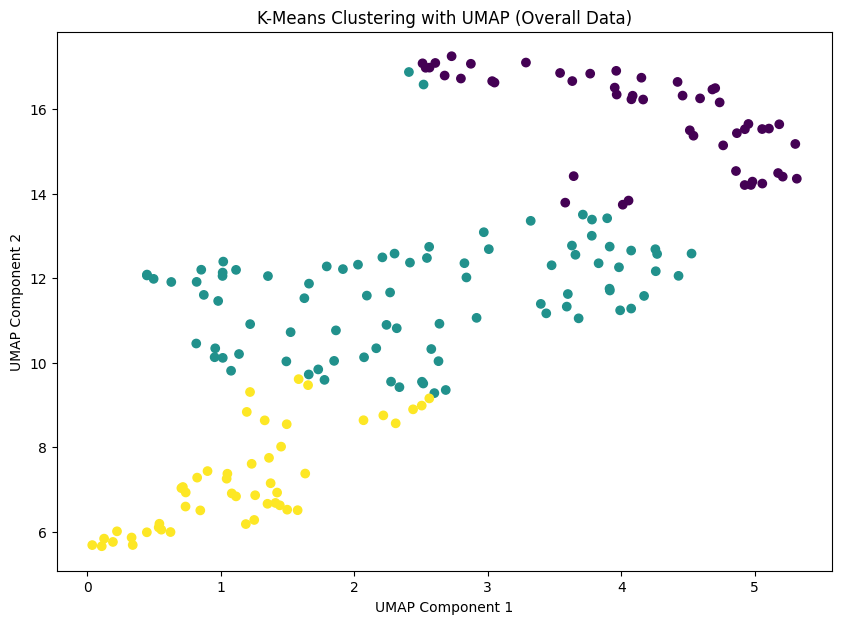

In [43]:
# Use the labels from the overall clustering
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('K-Means Clustering with UMAP (Overall Data)')
plt.show()

In [40]:
silhouette_avg = silhouette_score(clustering_df, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3566125390792128


To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:

In [ ]:
# Group the data by cluster and calculate the mean of each feature
clustering_df = pd.DataFrame(clustering_df, columns=clustering_df.columns)
clustering_df['cluster'] = y_kmeans
df_grouped = clustering_df.groupby('cluster').mean()

#Filter the DataFrame for each cluster
cluster1_data = clustering_df[clustering_df['cluster'] == 0]
cluster2_data = clustering_df[clustering_df['cluster'] == 1]
cluster3_data = clustering_df[clustering_df['cluster'] == 2]
cluster4_data = clustering_df[clustering_df['cluster'] == 3]

#Calculate the mean of each feature for each cluster
cluster1_mean = cluster1_data.mean()
cluster2_mean = cluster2_data.mean()
cluster3_mean = cluster3_data.mean()
cluster4_mean = cluster4_data.mean()

# Create a Markdown table string
table_md1 = f"""
| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | Mean value for cluster 4 |
|---|---|---|---|---|
| Condition | **{cluster1_mean['Condition']:.2f}** | {cluster2_mean['Condition']:.2f} | **{cluster3_mean['Condition']:.2f}** | {cluster4_mean['Condition']:.2f} |
| Ratio of patient information | {cluster1_mean['AmountPatientRatio']:.2f} | **{cluster2_mean['AmountPatientRatio']:.2f}** | {cluster3_mean['AmountPatientRatio']:.2f} | **{cluster4_mean['AmountPatientRatio']:.2f}** |
| Time of patient information (in seconds) | {cluster1_mean['TimePatientSeconds']:.2f} | **{cluster2_mean['TimePatientSeconds']:.2f}** | {cluster3_mean['TimePatientSeconds']:.2f} | **{cluster4_mean['TimePatientSeconds']:.2f}** |
| Q-type: Technical question | {cluster1_mean['TechnicalQuestion']:.2f} | {cluster2_mean['TechnicalQuestion']:.2f} | **{cluster3_mean['TechnicalQuestion']:.2f}** | {cluster4_mean['TechnicalQuestion']:.2f} |
| Q-type: Request | {cluster1_mean['Request']:.2f} | **{cluster2_mean['Request']:.2f}** | {cluster3_mean['Request']:.2f} | {cluster4_mean['Request']:.2f} |
| Q-type: Statement | {cluster1_mean['Statement']:.2f} | {cluster2_mean['Statement']:.2f} | **{cluster3_mean['Statement']:.2f}** | {cluster4_mean['Statement']:.2f} |
| Q-type: Differentiate | {cluster1_mean['Differentiate']:.2f} | {cluster2_mean['Differentiate']:.2f} | {cluster3_mean['Differentiate']:.2f} | **{cluster4_mean['Differentiate']:.2f}** |
| Q-type: Exclude | {cluster1_mean['Exclude']:.2f} | {cluster2_mean['Exclude']:.2f} | **{cluster3_mean['Exclude']:.2f}** | {cluster4_mean['Exclude']:.2f} |
| Q-type: Support diagnostics | {cluster1_mean['SupportDiagnostics']:.2f} | {cluster2_mean['SupportDiagnostics']:.2f} | **{cluster3_mean['SupportDiagnostics']:.2f}** | {cluster4_mean['SupportDiagnostics']:.2f} |
| Q-type: Support management | {cluster1_mean['SupportManagement']:.2f} | {cluster2_mean['SupportManagement']:.2f} | **{cluster3_mean['SupportManagement']:.2f}** | {cluster4_mean['SupportManagement']:.2f} |
| First question was self-formulated (and not copied) | {cluster1_mean['FirstQuestionSelf']:.2f} | {cluster2_mean['FirstQuestionSelf']:.2f} | {cluster3_mean['FirstQuestionSelf']:.2f} | {cluster4_mean['FirstQuestionSelf']:.2f} |
| Amount of mentioned diagnoses | **{cluster1_mean['AmountDiagnosesMentioned']:.2f}** | **{cluster2_mean['AmountDiagnosesMentioned']:.2f}** | {cluster3_mean['AmountDiagnosesMentioned']:.2f} | {cluster4_mean['AmountDiagnosesMentioned']:.2f} |
| Amount of excluded diagnoses | **{cluster1_mean['AmountDiagnosesExcluded']:.2f}** | **{cluster2_mean['AmountDiagnosesExcluded']:.2f}** | {cluster3_mean['AmountDiagnosesExcluded']:.2f} | {cluster4_mean['AmountDiagnosesExcluded']:.2f} |
| Duration of the total chat interaction (in seconds) | **{cluster1_mean['DurationInteractionSeconds']:.2f}** | {cluster2_mean['DurationInteractionSeconds']:.2f} | **{cluster3_mean['DurationInteractionSeconds']:.2f}** | {cluster4_mean['DurationInteractionSeconds']:.2f} |
| Amount of interactions in the chat | **{cluster1_mean['AmountInteraction']:.2f}** | {cluster2_mean['AmountInteraction']:.2f} | **{cluster3_mean['AmountInteraction']:.2f}** | {cluster4_mean['AmountInteraction']:.2f} |
"""

# Display Table
display(Markdown(table_md1))


| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | Mean value for cluster 4 |
|---|---|---|---|---|
| Condition | **0.24** | 0.48 | **0.78** | nan |
| Ratio of patient information | 0.87 | **0.84** | 0.85 | **nan** |
| Time of patient information (in seconds) | 353.06 | **268.45** | 186.96 | **nan** |
| Q-type: Technical question | 1.18 | 0.72 | **0.47** | nan |
| Q-type: Request | 1.22 | **1.00** | 10.67 | nan |
| Q-type: Statement | 2.08 | 1.27 | **0.33** | nan |
| Q-type: Differentiate | 0.31 | 0.20 | 0.16 | **nan** |
| Q-type: Exclude | 1.94 | 1.79 | **0.82** | nan |
| Q-type: Support diagnostics | 0.08 | 0.05 | **0.00** | nan |
| Q-type: Support management | 0.14 | 0.06 | **0.00** | nan |
| First question was self-formulated (and not copied) | 0.90 | 0.86 | 0.82 | nan |
| Amount of mentioned diagnoses | **9.00** | **8.38** | 5.31 | nan |
| Amount of excluded diagnoses | **0.20** | **0.23** | 0.02 | nan |
| Duration of the total chat interaction (in seconds) | **1135.35** | 760.08 | **390.10** | nan |
| Amount of interactions in the chat | **28.61** | 19.55 | **8.20** | nan |


#### Interpretation

TBD

* Cluster 1 - Quickies (or low intensity chat user)
    * The group that did use the chat the least (lowest duration of chat interaction and amount of chat interactions among all clusters)
    * Subsequently, the group that generated the lowest amount of differential diagnoses

* Cluster 2 - Generate me solutions, please! (or low informer and high requester)
    * The group that contains users who did not inform themselves before interacting in the chat (lowest values for ratio and time of patient information acquisition prior to entering the chat)
    * During the interaction they request the generation of diagnoses (highest value for Q-type: Request) to have a palette of diagnoses (highest amount of generated diagnoses among all clusters)

* Cluster 3 - Novice chatterbox (or high intensity chat user with low expert knowledge in the medical field)
    * The group that did use the chat the most (highest duration of chat interaction and amount of chat interactions among all clusters)
    * In the chat interaction, they mostly ask technical questions to close their knowledge gap (highest value for Q-type: Technical question). They also make the most statements (highest value for Q-type: Statement), but this is probably because of additional information or the interaction for the technical questions.
    * They also asked the most questions to exclude diagnoses (highest value for Q-type: Exclude). The information gained from the technical questions could possibly be used to then exclude diagnoses they thought of.

* Cluster 4 - Help me to get my ideas straight (or high informer and high differentiater)
    * The group with users who did inform themselves a lot about the patient case before interacting in the chat (highest values for ratio and time of patient information acquisition prior to entering the chat)
    * With this, they built themselves an image about the situation and had already a list of diagnoses in mind. Then, during the chat interaction, they asked questions to differentiate multiple diagnoses from each other (highest value for Q-type: Differentiate)


Condition ChatGPT vs. Human expert
* It is noticeable that cluster 1 and 2 contain participants who had in a majority ChatGPT as their interaction partner and cluster 3 and 4, on the other hand, contain mostly participants with a human expert as their chat partner.
* The clusters seem to differentiate between the conditions. Therefore, it makes sense to do an additonal clustering for each condition separately and to compare the results.

...

Let's now train the model with this number of clusters:

In [41]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clustering_df_imputed)

Explanation of `y_kmeans`:

The `y_kmeans` variable contains the classification in a cluster of the participant / user.

For example, participant 1 is in cluster 2, participant 2 is in cluster 1 and participant 3 is in cluster 2.

In [ ]:
#print(clustering_df.head())
y_kmeans

array([3, 3, 0, 3, 0, 3, 2, 3, 1, 0, 3, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1,
       1, 1, 0, 3, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       2, 3, 2, 2, 0, 3, 2, 2, 1, 0, 3, 2, 3, 3, 0, 0, 3, 0, 2, 3, 0, 3,
       3, 0, 2, 2, 0, 0, 0, 3, 2, 0, 3, 2, 3, 1, 1, 0, 0, 1, 1, 3, 2, 1,
       1, 1, 1, 0, 2, 2, 3, 0, 2, 3, 1, 2, 1, 3, 1, 0, 2, 3, 3, 0, 3, 0,
       1, 0, 2, 0, 0, 3, 3, 1, 3, 3, 1, 1, 2, 2, 2, 2, 2, 0, 2, 3, 0, 0,
       0, 3, 0, 0, 0, 3, 2, 0, 0, 0, 0, 1, 1, 3, 2, 1, 0, 3, 1, 3, 0, 3,
       0, 3, 3, 3, 1, 3, 0, 0, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 2, 1, 3, 1,
       3, 1, 3, 3, 1, 3, 3, 2, 0, 1, 0, 3], dtype=int32)

#### Visualization of the results

In a next step, let's visualize the clusters:

In [ ]:
#alt
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()

KeyError: 'principal component 1'

<Figure size 1000x700 with 0 Axes>

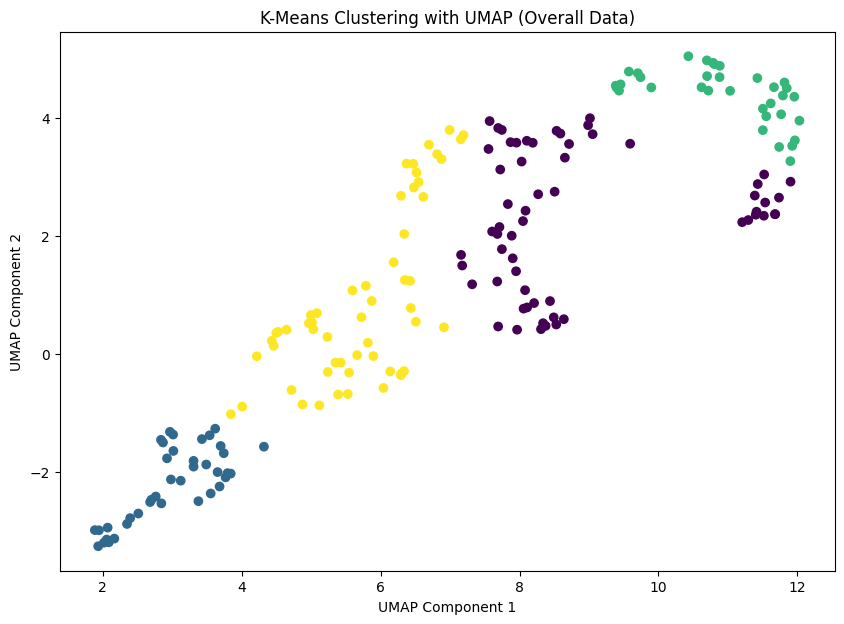

In [ ]:
# Use the labels from the overall clustering
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('K-Means Clustering with UMAP (Overall Data)')
plt.show()

In [ ]:
 from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(clustering_df_imputed, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.30128115744243417


To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:

In [44]:
# Group the data by cluster and calculate the mean of each feature
clustering_df_imputed_df = pd.DataFrame(clustering_df_imputed, columns=clustering_df.columns)
clustering_df_imputed_df['cluster'] = y_kmeans
df_grouped = clustering_df_imputed_df.groupby('cluster').mean()

#Filter the DataFrame for each cluster
cluster1_data = clustering_df_imputed_df[clustering_df_imputed_df['cluster'] == 0]
cluster2_data = clustering_df_imputed_df[clustering_df_imputed_df['cluster'] == 1]
cluster3_data = clustering_df_imputed_df[clustering_df_imputed_df['cluster'] == 2]
cluster4_data = clustering_df_imputed_df[clustering_df_imputed_df['cluster'] == 3]

#Calculate the mean of each feature for each cluster
cluster1_mean = cluster1_data.mean()
cluster2_mean = cluster2_data.mean()
cluster3_mean = cluster3_data.mean()
cluster4_mean = cluster4_data.mean()

# Create a Markdown table string
table_md1 = f"""
| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | Mean value for cluster 4 |
|---|---|---|---|---|
| Condition | **{cluster1_mean['Condition']:.2f}** | {cluster2_mean['Condition']:.2f} | **{cluster3_mean['Condition']:.2f}** | {cluster4_mean['Condition']:.2f} |
| Ratio of patient information | {cluster1_mean['AmountPatientRatio']:.2f} | **{cluster2_mean['AmountPatientRatio']:.2f}** | {cluster3_mean['AmountPatientRatio']:.2f} | **{cluster4_mean['AmountPatientRatio']:.2f}** |
| Time of patient information (in seconds) | {cluster1_mean['TimePatientSeconds']:.2f} | **{cluster2_mean['TimePatientSeconds']:.2f}** | {cluster3_mean['TimePatientSeconds']:.2f} | **{cluster4_mean['TimePatientSeconds']:.2f}** |
| Q-type: Technical question | {cluster1_mean['TechnicalQuestion']:.2f} | {cluster2_mean['TechnicalQuestion']:.2f} | **{cluster3_mean['TechnicalQuestion']:.2f}** | {cluster4_mean['TechnicalQuestion']:.2f} |
| Q-type: Request | {cluster1_mean['Request']:.2f} | **{cluster2_mean['Request']:.2f}** | {cluster3_mean['Request']:.2f} | {cluster4_mean['Request']:.2f} |
| Q-type: Statement | {cluster1_mean['Statement']:.2f} | {cluster2_mean['Statement']:.2f} | **{cluster3_mean['Statement']:.2f}** | {cluster4_mean['Statement']:.2f} |
| Q-type: Differentiate | {cluster1_mean['Differentiate']:.2f} | {cluster2_mean['Differentiate']:.2f} | {cluster3_mean['Differentiate']:.2f} | **{cluster4_mean['Differentiate']:.2f}** |
| Q-type: Exclude | {cluster1_mean['Exclude']:.2f} | {cluster2_mean['Exclude']:.2f} | **{cluster3_mean['Exclude']:.2f}** | {cluster4_mean['Exclude']:.2f} |
| First question was self-formulated (and not copied) | {cluster1_mean['FirstQuestionSelf']:.2f} | {cluster2_mean['FirstQuestionSelf']:.2f} | {cluster3_mean['FirstQuestionSelf']:.2f} | {cluster4_mean['FirstQuestionSelf']:.2f} |
| Amount of mentioned diagnoses | **{cluster1_mean['AmountDiagnosesMentioned']:.2f}** | **{cluster2_mean['AmountDiagnosesMentioned']:.2f}** | {cluster3_mean['AmountDiagnosesMentioned']:.2f} | {cluster4_mean['AmountDiagnosesMentioned']:.2f} |
| Duration of the total chat interaction (in seconds) | **{cluster1_mean['DurationInteractionSeconds']:.2f}** | {cluster2_mean['DurationInteractionSeconds']:.2f} | **{cluster3_mean['DurationInteractionSeconds']:.2f}** | {cluster4_mean['DurationInteractionSeconds']:.2f} |
| Amount of interactions in the chat | **{cluster1_mean['AmountInteraction']:.2f}** | {cluster2_mean['AmountInteraction']:.2f} | **{cluster3_mean['AmountInteraction']:.2f}** | {cluster4_mean['AmountInteraction']:.2f} |
"""

# Display Table
display(Markdown(table_md1))

ValueError: Shape of passed values is (184, 16), indices imply (184, 17)

#### Interpretation


* Cluster 1 - Quickies (or low intensity chat user)
    * The group that did use the chat the least (lowest duration of chat interaction and amount of chat interactions among all clusters)
    * Subsequently, the group that generated the lowest amount of differential diagnoses

* Cluster 2 - Generate me solutions, please! (or low informer and high requester)
    * The group that contains users who did not inform themselves before interacting in the chat (lowest values for ratio and time of patient information acquisition prior to entering the chat)
    * During the interaction they request the generation of diagnoses (highest value for Q-type: Request) to have a palette of diagnoses (highest amount of generated diagnoses among all clusters)

* Cluster 3 - Novice chatterbox (or high intensity chat user with low expert knowledge in the medical field)
    * The group that did use the chat the most (highest duration of chat interaction and amount of chat interactions among all clusters)
    * In the chat interaction, they mostly ask technical questions to close their knowledge gap (highest value for Q-type: Technical question). They also make the most statements (highest value for Q-type: Statement), but this is probably because of additional information or the interaction for the technical questions.
    * They also asked the most questions to exclude diagnoses (highest value for Q-type: Exclude). The information gained from the technical questions could possibly be used to then exclude diagnoses they thought of.

* Cluster 4 - Help me to get my ideas straight (or high informer and high differentiater)
    * The group with users who did inform themselves a lot about the patient case before interacting in the chat (highest values for ratio and time of patient information acquisition prior to entering the chat)
    * With this, they built themselves an image about the situation and had already a list of diagnoses in mind. Then, during the chat interaction, they asked questions to differentiate multiple diagnoses from each other (highest value for Q-type: Differentiate)


Condition ChatGPT vs. Human expert
* It is noticeable that cluster 1 and 2 contain participants who had in a majority ChatGPT as their interaction partner and cluster 3 and 4, on the other hand, contain mostly participants with a human expert as their chat partner.
* The clusters seem to differentiate between the conditions. Therefore, it makes sense to do an additonal clustering for each condition separately and to compare the results.

### K-means for the condition ChatGPT

PCA to reduce the dimensionality:

In [337]:
import umap.umap_ as umap
from sklearn.impute import SimpleImputer
import numpy as np

# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_gpt)
principalDf = pd.DataFrame(data = embedding
             , columns = ['umap component 1', 'umap component 2'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [338]:
# Calculate explained variance ratio for UMAP
# 'embedding' object from the previous UMAP step is available
if 'reducer' in globals():
    explained_variance_ratio = pca.explained_variance_ratio_
    print("\nExplained Variance Ratio for Principal Components:")
    print(f"Principal Component 1: {explained_variance_ratio[0]:.4f}")
    print(f"Principal Component 2: {explained_variance_ratio[1]:.4f}")
else:
    print("\nPCA was not performed. Cannot calculate explained variance ratio for principal components.")


Explained Variance Ratio for Principal Components:
Principal Component 1: 0.8188
Principal Component 2: 0.1461


Use of the elbow method to find the optimal number of clusters:

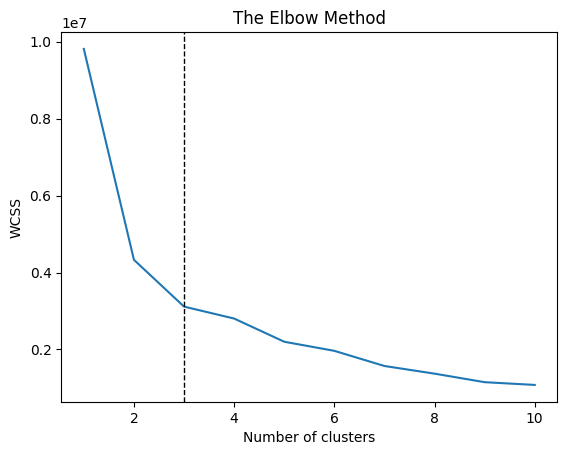

In [339]:
wcss = []
for i in range(1, 11): # we'll do it for 10 clusters to find the optimal number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clustering_gpt)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x = 3, linewidth = 1, color = 'black', linestyle = '--')
plt.show()

The optimal number of clusters is **3**.

Use of the average silhouette score method to find the optimal number of clusters:

In [340]:
# Create a list of hypothetical scenarios for different number of clusters
# We'll do it again for 10 clusters to find the optimal number of clusters
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(clustering_gpt) for k in range (1,10)]

silhouette_scores = [silhouette_score(clustering_gpt, model.labels_)
                      for model in kmeans_per_k[1:]]

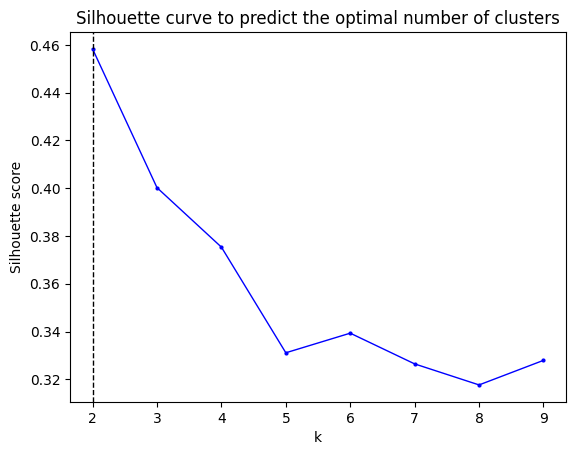

In [341]:
# Plot the silhouette scores graph
#rcParams['figure.figsize'] = 16, 5
plt.plot(range(2, 10), silhouette_scores, 'bo-',
             linewidth = 1, markersize = 2, label = 'Silhouette curve')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette curve to predict the optimal number of clusters')

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scores) + 2

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = k, linewidth = 1, color = 'black', linestyle = '--')

plt.show()

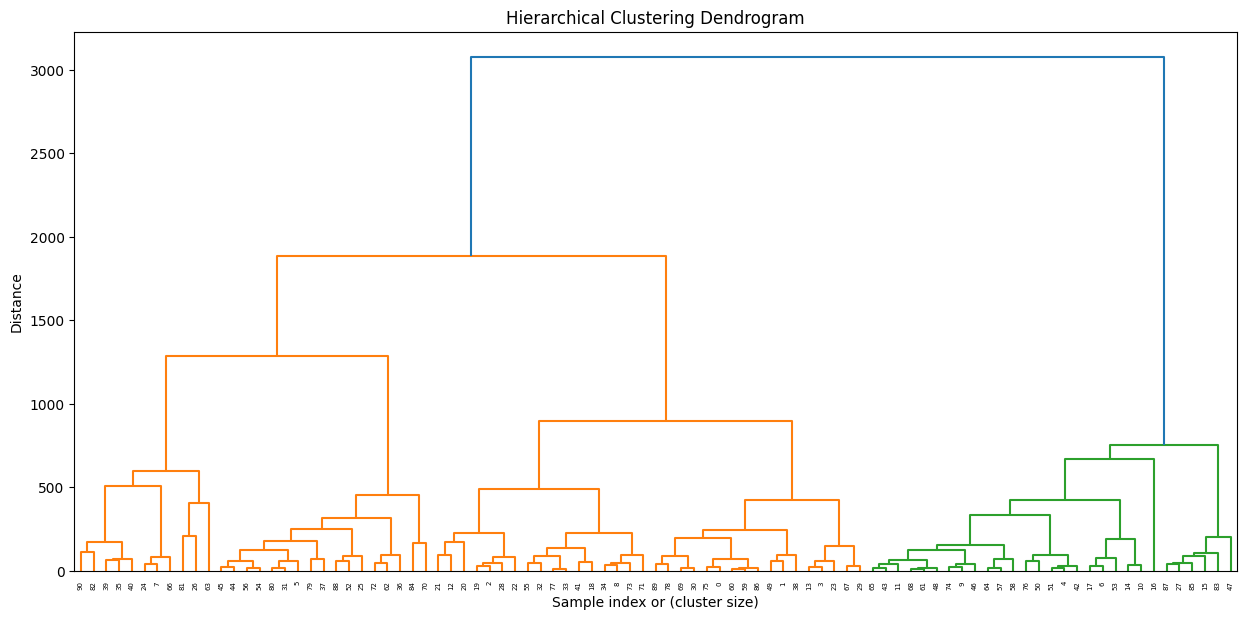

In [342]:
# add a dendogram

# Select the columns you want to use for the dendrogram
# Make sure to exclude non-numeric columns like 'Condition' and 'Count'
# Also, ensure the data is imputed or handled for missing values before linking
dendrogram_data = clustering_gpt.drop(columns=['Count'])

# Perform hierarchical clustering using Ward's method
linked = linkage(dendrogram_data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

In [343]:
print("WCSS (Inertia) scores for each number of clusters (1-10):")
print(wcss)

WCSS (Inertia) scores for each number of clusters (1-10):
[9809541.762515258, 4330493.267743925, 3114466.9694765345, 2804371.2118108636, 2201596.863409959, 1965253.4085317422, 1571380.8955362919, 1372588.475728436, 1150846.5853044593, 1079612.2057800018]


Train the model with this number of clusters:

In [344]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clustering_gpt)

#### Visualization of the results

Visualization of the clusters:

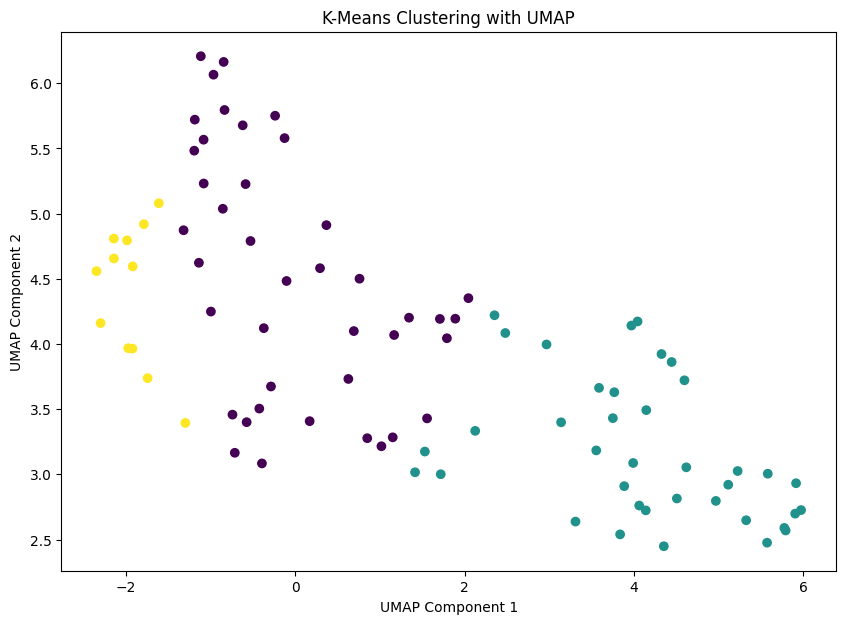

In [53]:
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('K-Means Clustering with UMAP')
plt.show()

In [346]:
silhouette_avg = silhouette_score(clustering_gpt, labels)
print("Silhouette Score:", silhouette_avg)

ValueError: Found input variables with inconsistent numbers of samples: [91, 184]

Distribution of the values for each cluster:

In [55]:
# Group the data by cluster and calculate the mean of each feature
# diesen SChritt kann man weglassen, wenn man vorher schaut, dass die NaN mit 0 ersetzt sind im dataframe
#clustering_gpt_imputed_df = pd.DataFrame(clustering_gpt_imputed, columns=clustering_gpt.columns)
clustering_gpt['cluster'] = y_kmeans
df_grouped = clustering_gpt.groupby('cluster').mean()

#Filter the DataFrame for each cluster
cluster1_data = clustering_gpt[clustering_gpt['cluster'] == 0]
cluster2_data = clustering_gpt[clustering_gpt['cluster'] == 1]
cluster3_data = clustering_gpt[clustering_gpt['cluster'] == 2]
cluster4_data = clustering_gpt[clustering_gpt['cluster'] == 3]

#Calculate the mean of each feature for each cluster
cluster1_mean = cluster1_data.mean()
cluster2_mean = cluster2_data.mean()
cluster3_mean = cluster3_data.mean()
cluster4_mean = cluster4_data.mean()

# Create a Markdown table string
table_md1 = f"""
| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | Mean value for cluster 4 |
|---|---|---|---|---|
| Ratio of patient information | {cluster1_mean['AmountPatientRatio']:.2f} | {cluster2_mean['AmountPatientRatio']:.2f} | **{cluster3_mean['AmountPatientRatio']:.2f}** | **{cluster4_mean['AmountPatientRatio']:.2f}** |
| Time of patient information (in seconds) | {cluster1_mean['TimePatientSeconds']:.2f} | {cluster2_mean['TimePatientSeconds']:.2f} | **{cluster3_mean['TimePatientSeconds']:.2f}** | **{cluster4_mean['TimePatientSeconds']:.2f}** |
| Q-type: Technical question | {cluster1_mean['TechnicalQuestion']:.2f} | {cluster2_mean['TechnicalQuestion']:.2f} | **{cluster3_mean['TechnicalQuestion']:.2f}** | {cluster4_mean['TechnicalQuestion']:.2f} |
| Q-type: Request | {cluster1_mean['Request']:.2f} | {cluster2_mean['Request']:.2f} | **{cluster3_mean['Request']:.2f}** | {cluster4_mean['Request']:.2f} |
| Q-type: Statement | {cluster1_mean['Statement']:.2f} | {cluster2_mean['Statement']:.2f} | {cluster3_mean['Statement']:.2f} | **{cluster4_mean['Statement']:.2f}** |
| Q-type: Differentiate | {cluster1_mean['Differentiate']:.2f} | **{cluster2_mean['Differentiate']:.2f}** | {cluster3_mean['Differentiate']:.2f} | {cluster4_mean['Differentiate']:.2f} |
| Q-type: Exclude | {cluster1_mean['Exclude']:.2f} | {cluster2_mean['Exclude']:.2f} | **{cluster3_mean['Exclude']:.2f}** | {cluster4_mean['Exclude']:.2f} |
| First question was self-formulated (and not copied) | {cluster1_mean['FirstQuestionSelf']:.2f} | {cluster2_mean['FirstQuestionSelf']:.2f} | {cluster3_mean['FirstQuestionSelf']:.2f} | {cluster4_mean['FirstQuestionSelf']:.2f} |
| Amount of mentioned diagnoses | **{cluster1_mean['AmountDiagnosesMentioned']:.2f}** | {cluster2_mean['AmountDiagnosesMentioned']:.2f} | {cluster3_mean['AmountDiagnosesMentioned']:.2f} | **{cluster4_mean['AmountDiagnosesMentioned']:.2f}** |
| Duration of the total chat interaction (in seconds) | **{cluster1_mean['DurationInteractionSeconds']:.2f}** | {cluster2_mean['DurationInteractionSeconds']:.2f} | {cluster3_mean['DurationInteractionSeconds']:.2f} | **{cluster4_mean['DurationInteractionSeconds']:.2f}** |
| Amount of interactions in the chat | **{cluster1_mean['AmountInteraction']:.2f}** | {cluster2_mean['AmountInteraction']:.2f} | {cluster3_mean['AmountInteraction']:.2f} | **{cluster4_mean['AmountInteraction']:.2f}** |
"""

# Display Table
display(Markdown(table_md1))


| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | Mean value for cluster 4 |
|---|---|---|---|---|
| Ratio of patient information | 0.84 | 0.86 | **0.92** | **nan** |
| Time of patient information (in seconds) | 299.24 | 180.79 | **370.58** | **nan** |
| Q-type: Technical question | 0.56 | 0.53 | **1.25** | nan |
| Q-type: Request | 1.22 | 13.63 | **1.67** | nan |
| Q-type: Statement | 1.22 | 0.29 | 1.33 | **nan** |
| Q-type: Differentiate | 0.17 | **0.18** | 0.42 | nan |
| Q-type: Exclude | 1.93 | 0.82 | **2.00** | nan |
| First question was self-formulated (and not copied) | 0.73 | 0.76 | 0.92 | nan |
| Amount of mentioned diagnoses | **12.32** | 6.16 | 16.75 | **nan** |
| Duration of the total chat interaction (in seconds) | **756.27** | 370.84 | 1134.42 | **nan** |
| Amount of interactions in the chat | **17.93** | 7.97 | 23.33 | **nan** |


#### Interpretation


* Cluster 1 - Low performer
    * The group that did use the chat the least (lowest duration of chat interaction and amount of chat interactions among all clusters) and that generated the lowest amount of diagnoses  

* Cluster 2 - Differentiater
    * The group that asked the most questions to differentiate between two or more differential diagnoses (highest values for Q-type: Differentiate)
    * Otherwise they are average users / perfomers (no peak values in the other categories)

* Cluster 3 - I know nothing, please do everyting for me! (or low informer and high requester as well as excluder)
    * The group that contains users who did not inform themselves before interacting in the chat (lowest values for ratio and time of patient information acquisition prior to entering the chat)
    * In the chat interaction, they theny mostly ask technical questions to close their knowledge gap (highest value for Q-type: Technical question). They also ask the most requests to ChatGPT to generate diagnoses (highest value for Q-type: Request), and additionally ask the most questions to exclude diagnoses (highest value for Q-type: Exclude). Basically, they ask ChatGPT to generate them diagnoses and then want ChatGPT to reduce the amount of target diagnoes by excluding differential diagnoses.
    * This cluster is to some extent similar to cluster 2 in the overall model

* Cluster 4 - High performer
    * The group that did inform themselves the most (highest values for patient information acquisition variables), use the chat the most (highest duration of chat interaction and amount of chat interactions among all clusters), and also generated the highest amount of diagnoses  
    * In addition, they made the most statements during the chat interaction (highest value for Q-type: Statement)


### K-means for the condition Human expert

PCA to reduce the dimensionality:

In [353]:
import umap.umap_ as umap
from sklearn.impute import SimpleImputer
import numpy as np

# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_human)
principalDf = pd.DataFrame(data = embedding
             , columns = ['umap component 1', 'umap component 2'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [354]:
# Calculate explained variance ratio for UMAP
# 'embedding' object from the previous UMAP step is available
if 'reducer' in globals():
    explained_variance_ratio = pca.explained_variance_ratio_
    print("\nExplained Variance Ratio for Principal Components:")
    print(f"Principal Component 1: {explained_variance_ratio[0]:.4f}")
    print(f"Principal Component 2: {explained_variance_ratio[1]:.4f}")
else:
    print("\nPCA was not performed. Cannot calculate explained variance ratio for principal components.")


Explained Variance Ratio for Principal Components:
Principal Component 1: 0.8188
Principal Component 2: 0.1461


Use of the elbow method to find the optimal number of clusters:

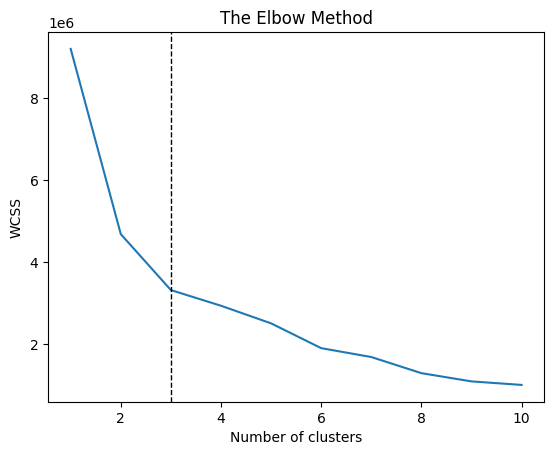

In [355]:
wcss = []
for i in range(1, 11): # we'll do it for 10 clusters to find the optimal number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clustering_human)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x = 3, linewidth = 1, color = 'black', linestyle = '--')
plt.show()

The optimal number of clusters is **3**.

Use of the average silhouette score method to find the optimal number of clusters:

In [356]:
# Create a list of hypothetical scenarios for different number of clusters
# We'll do it again for 10 clusters to find the optimal number of clusters
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(clustering_human) for k in range (1,10)]

silhouette_scores = [silhouette_score(clustering_human, model.labels_)
                      for model in kmeans_per_k[1:]]

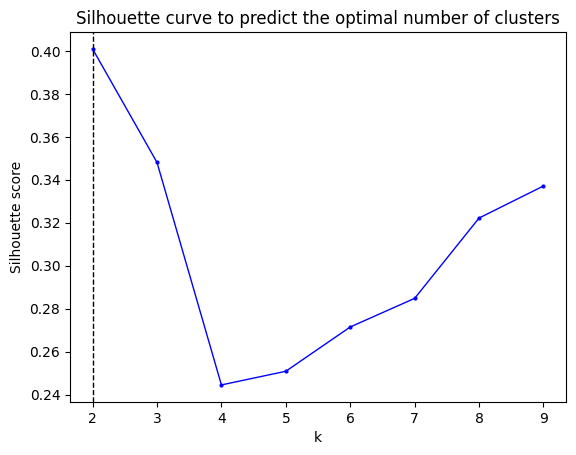

In [357]:
# Plot the silhouette scores graph
#rcParams['figure.figsize'] = 16, 5
plt.plot(range(2, 10), silhouette_scores, 'bo-',
             linewidth = 1, markersize = 2, label = 'Silhouette curve')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette curve to predict the optimal number of clusters')

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scores) + 2

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = k, linewidth = 1, color = 'black', linestyle = '--')

plt.show()

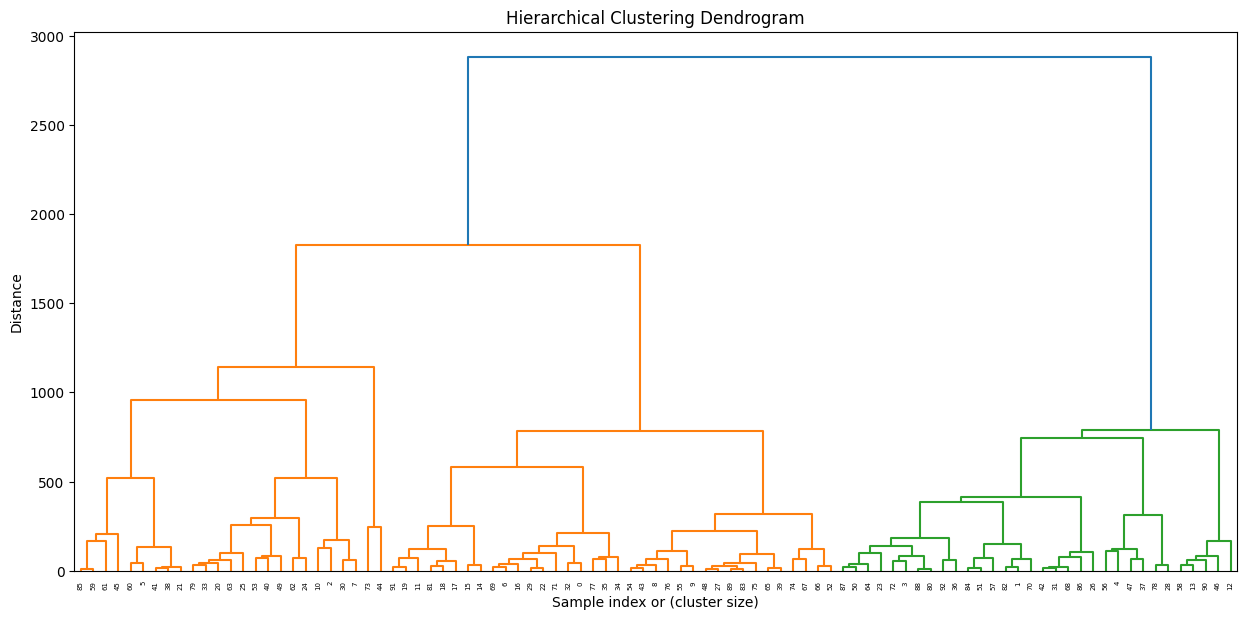

In [358]:
# add a dendogram

# Select the columns you want to use for the dendrogram
# Make sure to exclude non-numeric columns like 'Condition' and 'Count'
# Also, ensure the data is imputed or handled for missing values before linking
dendrogram_data = clustering_human.drop(columns=['Count'])

# Perform hierarchical clustering using Ward's method
linked = linkage(dendrogram_data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

Train the model with this number of clusters:

In [359]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clustering_human)

#### Visualization of the results

Visualization of the clusters:

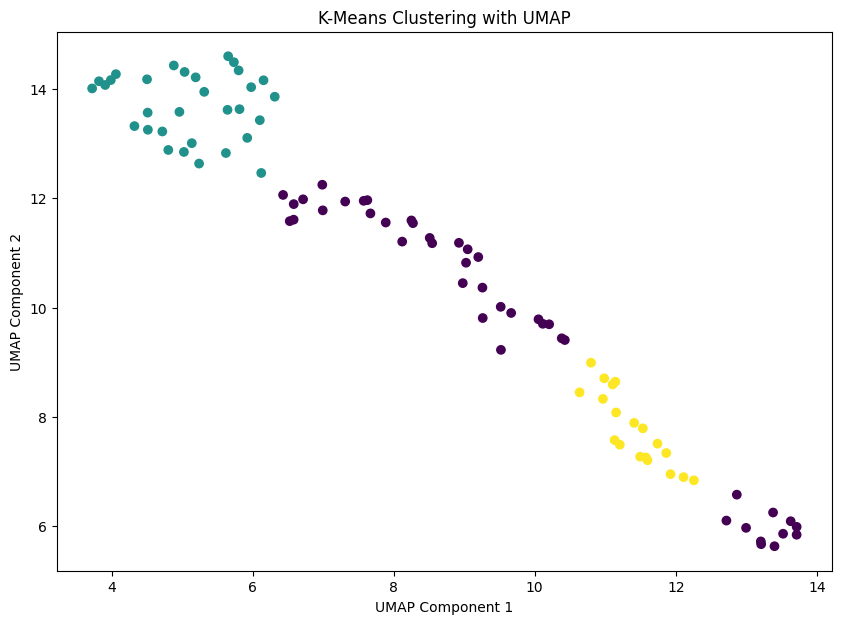

In [60]:
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('K-Means Clustering with UMAP')
plt.show()

In [360]:
silhouette_avg = silhouette_score(clustering_human, labels)
print("Silhouette Score:", silhouette_avg)

print("WCSS (Inertia) scores for each number of clusters (1-10):")
print(wcss)

ValueError: Found input variables with inconsistent numbers of samples: [93, 184]

Distribution of the values for each cluster:

In [62]:
# Group the data by cluster and calculate the mean of each feature
#Diesen Schritt kann man auch weglassen, wenn man das imputed dataset nicht macht..
#clustering_human_imputed_df = pd.DataFrame(clustering_human_imputed, columns=clustering_human.columns)
clustering_human['cluster'] = y_kmeans
df_grouped = clustering_human.groupby('cluster').mean()

#Filter the DataFrame for each cluster
cluster1_data = clustering_human[clustering_human['cluster'] == 0]
cluster2_data = clustering_human[clustering_human['cluster'] == 1]
cluster3_data = clustering_human[clustering_human['cluster'] == 2]
cluster4_data = clustering_human[clustering_human['cluster'] == 3]
cluster5_data = clustering_human[clustering_human['cluster'] == 4]

#Calculate the mean of each feature for each cluster
cluster1_mean = cluster1_data.mean()
cluster2_mean = cluster2_data.mean()
cluster3_mean = cluster3_data.mean()
cluster4_mean = cluster4_data.mean()
cluster5_mean = cluster5_data.mean()


# Create a Markdown table string
table_md1 = f"""
| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | Mean value for cluster 4 | Mean value for cluster 5 |
|---|---|---|---|---|---|
| Ratio of patient information | {cluster1_mean['AmountPatientRatio']:.2f} | **{cluster2_mean['AmountPatientRatio']:.2f}** | **{cluster3_mean['AmountPatientRatio']:.2f}** | {cluster4_mean['AmountPatientRatio']:.2f} | {cluster5_mean['AmountPatientRatio']:.2f} |
| Time of patient information (in seconds) | {cluster1_mean['TimePatientSeconds']:.2f} | **{cluster2_mean['TimePatientSeconds']:.2f}** | **{cluster3_mean['TimePatientSeconds']:.2f}** | {cluster4_mean['TimePatientSeconds']:.2f} | {cluster5_mean['TimePatientSeconds']:.2f} |
| Q-type: Technical question | {cluster1_mean['TechnicalQuestion']:.2f} | {cluster2_mean['TechnicalQuestion']:.2f} | **{cluster3_mean['TechnicalQuestion']:.2f}** | **{cluster4_mean['TechnicalQuestion']:.2f}** | {cluster5_mean['TechnicalQuestion']:.2f} |
| Q-type: Request | **{cluster1_mean['Request']:.2f}** | {cluster2_mean['Request']:.2f} | {cluster3_mean['Request']:.2f} | {cluster4_mean['Request']:.2f} | {cluster5_mean['Request']:.2f} |
| Q-type: Statement | {cluster1_mean['Statement']:.2f} | {cluster2_mean['Statement']:.2f} | {cluster3_mean['Statement']:.2f} | **{cluster4_mean['Statement']:.2f}** | {cluster5_mean['Statement']:.2f} |
| Q-type: Differentiate | {cluster1_mean['Differentiate']:.2f} | {cluster2_mean['Differentiate']:.2f} | **{cluster3_mean['Differentiate']:.2f}** | {cluster4_mean['Differentiate']:.2f} | {cluster5_mean['Differentiate']:.2f} |
| Q-type: Exclude | **{cluster1_mean['Exclude']:.2f}** | {cluster2_mean['Exclude']:.2f} | {cluster3_mean['Exclude']:.2f} | {cluster4_mean['Exclude']:.2f} | {cluster5_mean['Exclude']:.2f} |
| First question was self-formulated (and not copied) | {cluster1_mean['FirstQuestionSelf']:.2f} | {cluster2_mean['FirstQuestionSelf']:.2f} | {cluster3_mean['FirstQuestionSelf']:.2f} | {cluster4_mean['FirstQuestionSelf']:.2f} | {cluster5_mean['FirstQuestionSelf']:.2f} |
| Amount of mentioned diagnoses | **{cluster1_mean['AmountDiagnosesMentioned']:.2f}** | {cluster2_mean['AmountDiagnosesMentioned']:.2f} | {cluster3_mean['AmountDiagnosesMentioned']:.2f} | {cluster4_mean['AmountDiagnosesMentioned']:.2f} | **{cluster5_mean['AmountDiagnosesMentioned']:.2f}** |
| Duration of the total chat interaction (in seconds) | {cluster1_mean['DurationInteractionSeconds']:.2f} | {cluster2_mean['DurationInteractionSeconds']:.2f} | {cluster3_mean['DurationInteractionSeconds']:.2f} | **{cluster4_mean['DurationInteractionSeconds']:.2f}** | **{cluster5_mean['DurationInteractionSeconds']:.2f}** |
| Amount of interactions in the chat | {cluster1_mean['AmountInteraction']:.2f} | **{cluster2_mean['AmountInteraction']:.2f}** | {cluster3_mean['AmountInteraction']:.2f} | {cluster4_mean['AmountInteraction']:.2f} | **{cluster5_mean['AmountInteraction']:.2f}** |
"""

# Display Table
display(Markdown(table_md1))


| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | Mean value for cluster 4 | Mean value for cluster 5 |
|---|---|---|---|---|---|
| Ratio of patient information | 0.81 | **0.86** | **0.89** | nan | nan |
| Time of patient information (in seconds) | 251.74 | **246.39** | **394.68** | nan | nan |
| Q-type: Technical question | 0.86 | 0.65 | **1.47** | **nan** | nan |
| Q-type: Request | **1.00** | 0.61 | 1.00 | nan | nan |
| Q-type: Statement | 1.86 | 0.90 | 2.21 | **nan** | nan |
| Q-type: Differentiate | 0.23 | 0.16 | **0.32** | nan | nan |
| Q-type: Exclude | **1.91** | 1.13 | 2.00 | nan | nan |
| First question was self-formulated (and not copied) | 0.93 | 0.97 | 0.95 | nan | nan |
| Amount of mentioned diagnoses | **5.47** | 3.71 | 6.95 | nan | **nan** |
| Duration of the total chat interaction (in seconds) | 920.26 | 579.81 | 1255.63 | **nan** | **nan** |
| Amount of interactions in the chat | 24.98 | **14.19** | 34.37 | nan | **nan** |


#### Interpretation


* Cluster 1 - Requester and Excluder
    * The group that requested the most differential diagnoses (highest value for Q-type: Request) to the human and at the same time also asked them questions to exclude diagnoses (highest value for Q-type: Exclude)
    * This group is similar to cluster 3 of the ChatGPT model and similar to cluster 2 of the overall model

* Cluster 2 - Low informer but high interacter
    * The group that informed themselves the least about the patient case prior to initiating the chat interaction (lowest values for ratio and time of patient information acquisition prior to entering the chat)
    * But they then wrote the most messages to the human expert (highest amount of chat interactions among all clusters)

* Cluster 3 - High informer, experts and differentiater
    * The group that contains users who did inform themselves thoroughly before interacting in the chat (higest values for patient information acquisition variables)
    * They did not only know the most about the patient case, but also about the medical field in general - since they asked the least technical questions in the chat. This could be an indication for a group of people who like to internalize knowledge, being it on the patient case or on medical knowledge in general.
    * With their expert knowledge, they mostly asked questions in the chat that helped them to differentiate existing ideas and diagnoses they generated themselves (highest value for Q-type: Differentiate)

* Cluster 4 - Encyclopedia
    * People in this group asked mostly technical questions to close their knowledge gap (highest value for Q-type: Technical question). They also make the most statements (highest value for Q-type: Statement). This is probably because of additional information or the interaction for the technical questions.
    * Connected to this, people in this cluster had the longest chat interaction (longest duration of chat interaction in seconds), even tough they did not write the most messages back and forth (not the highest amount of chat interactions). This makes sense, since asking technical questions (as well as reading/understanding the answers) and giving information for them requires some time.
    * This cluster is similar to cluster 3 of the overall model.

* Cluster 5 - Low performer
    * This group shows the lowest values for the chat interaction variables (i.e., duration and amount of chat interactions) and in addition has the lowest amount of generated diagnoses.
    * Therefore, people in this group did use the chat the least.
    * With this, the cluster is similar to cluster 1 of the ChatGPT model.


Conclusion
* Some clusters regarding the human expert are similar to ChatGPT (e.g., cluster "Please do everything for me"), but some others are different (e.g., cluster 2 - 4).
* There seems to be some influence of the chat partner when it comes to different groups of chat users. But at the same time, some groups of users are consistent, even with differing chat partner.
* Further data can help to support this assumption. That additional data will be available and provided in the near future.

### Further models

For the final project, further models, additional to the K-means models, will be tested. To find the right models to cluster the final data sample, the following illustration can be used as a support. The illustration shows how different techniques and models create clusters differently. With this, the optimal models to implement can be chosen, according to the distribution of the data points after the PCA.

Possible further models for our data could for example be the DBSCAN or the Gaussian Mixture.


![Different Clustering Models](https://github.com/Mayra-N-S/CAS_ADS/blob/main/Final%20Project/Assignment/DifferentClusteringModels.jpg?raw=1)

### CBSCAN

In [128]:
#Create a dataframe with the necessary variables
clustering_df2 = df2[['Condition', 'AmountPatientRatio', 'TimePatientSeconds', 'TechnicalQuestion', 'Request', 'Statement', 'Differentiate', 'Exclude', 'SupportDiagnostics', 'SupportManagement', 'FirstQuestionSelf', 'AmountDiagnosesMentioned', 'AmountDiagnosesExcluded', 'DurationInteractionSeconds', 'AmountInteraction']]

#Create a binary column for the variable 'Condition'
#1 = ChatGPT, 0 = Human expert
clustering_df2['Condition'] = clustering_df2['Condition'].apply(lambda x: 1 if x == "GPT" else 0)

#Check if it worked
#print(clustering_df2)

In [253]:
#Create two subsets for each condition
clustering_gpt2 = clustering_df2[clustering_df2['Condition'] == 1]
clustering_human2 = clustering_df2[clustering_df2['Condition'] == 0]

#Check if it worked
clustering_gpt2.head()
clustering_human2.head()

,Condition,AmountPatientRatio,TimePatientSeconds,TechnicalQuestion,Request,Statement,Differentiate,Exclude,SupportDiagnostics,SupportManagement,FirstQuestionSelf,AmountDiagnosesMentioned,AmountDiagnosesExcluded,DurationInteractionSeconds,AmountInteraction,hdbscan_cluster,dbscan_cluster
4,0,0.166667,111,0.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,7.0,1.0,1041,28,-1,0
5,0,0.333333,205,0.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,731,28,4,0
6,0,0.500000,201,0.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,3.0,0.0,1183,28,-1,0
7,0,0.833333,182,1.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,2.0,0.0,651,15,3,0
10,0,0.833333,464,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,695,6,-1,0


In [129]:
#Check if tehre are missing values in the data frames
print(clustering_df2.isna().sum())

print(clustering_gpt2.isna().sum())
print(clustering_human2.isna().sum())
#No, there are no missing values left


Condition                     0
AmountPatientRatio            0
TimePatientSeconds            0
TechnicalQuestion             0
Request                       0
Statement                     0
Differentiate                 0
Exclude                       0
SupportDiagnostics            0
SupportManagement             0
FirstQuestionSelf             0
AmountDiagnosesMentioned      0
AmountDiagnosesExcluded       0
DurationInteractionSeconds    0
AmountInteraction             0
dtype: int64
Count                         0
Condition                     0
AmountPatientRatio            0
TimePatientSeconds            0
TechnicalQuestion             0
Request                       0
Statement                     0
Differentiate                 0
Exclude                       0
SupportDiagnostics            0
SupportManagement             0
FirstQuestionSelf             0
AmountDiagnosesMentioned      0
AmountDiagnosesExcluded       0
DurationInteractionSeconds    0
AmountInteraction          

In [199]:
# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_df2)
principalDf = pd.DataFrame(data = embedding, columns = ['umap component 1', 'umap component 2'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


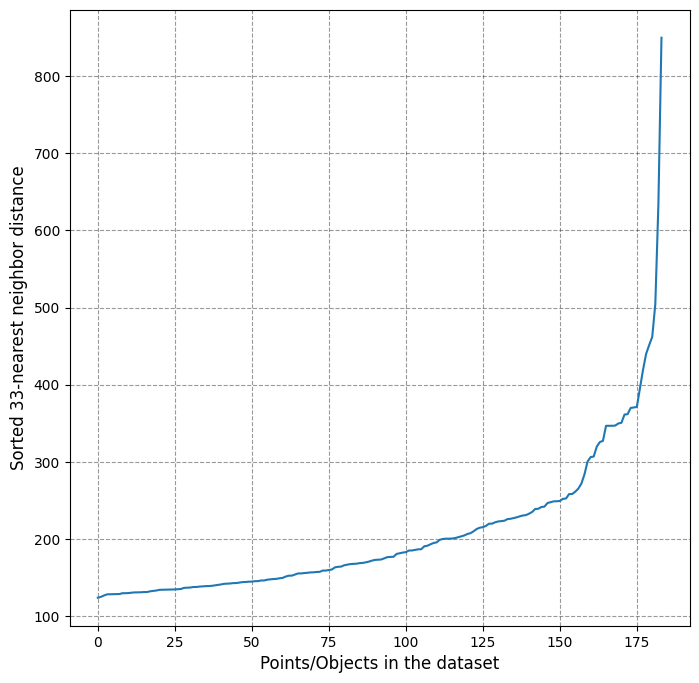

In [200]:
#libraries
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(clustering_df2)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(clustering_df2)

    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * clustering_df2.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=clustering_df2, k=k)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


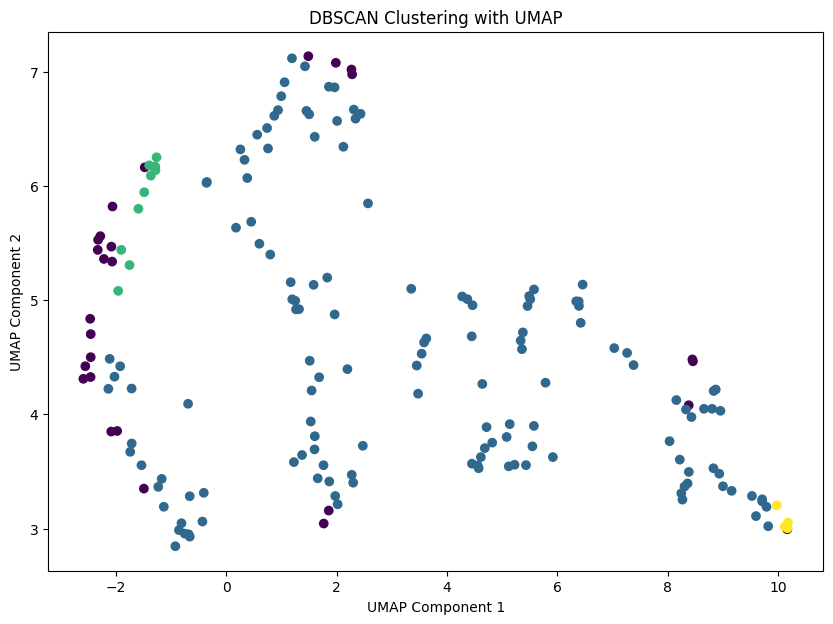

Estimated number of clusters: 3
Estimated number of noise points: 27
Silhouette Score: -0.001114782236083773

Mean values for each DBSCAN cluster (excluding noise):


,Condition,AmountPatientRatio,TimePatientSeconds,TechnicalQuestion,Request,Statement,Differentiate,Exclude,SupportDiagnostics,SupportManagement,FirstQuestionSelf,AmountDiagnosesMentioned,AmountDiagnosesExcluded,DurationInteractionSeconds,AmountInteraction,hdbscan_cluster
dbscan_cluster,,,,,,,,,,,,,,,,
0,0.507042,0.846244,236.661972,0.711268,0.992958,1.133803,0.204225,1.577465,0.028169,0.035211,0.852113,7.528169,0.140845,715.859155,17.295775,1.042254
1,0.400000,0.983333,462.600000,1.100000,1.900000,1.700000,0.500000,2.500000,0.200000,0.500000,1.000000,12.600000,0.400000,1013.700000,26.300000,-0.400000
2,1.000000,0.733333,72.800000,0.400000,1.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.800000,3.600000,0.000000,171.600000,5.000000,-1.000000


In [239]:
import matplotlib.pyplot as plt
#!pip install scikit-learn
from sklearn.cluster import DBSCAN

# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_df2)
principalDf = pd.DataFrame(data = embedding, columns = ['umap component 1', 'umap component 2'])

# Apply DBSCAN
dbscan = DBSCAN(eps=74, min_samples=4) # default parameter values: 0.5 and 5, then eps and min_samples was tuned
dbscan_labels = dbscan.fit_predict(clustering_df2)

# Visualize the results (using the previously calculated UMAP embedding for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=dbscan_labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('DBSCAN Clustering with UMAP')
plt.show()

# Print the number of clusters found (excluding noise points, labeled as -1)
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# Calculate silhouette score (if there are more than 1 clusters and less than all points are noise)
if n_clusters_ > 1 and n_clusters_ < len(clustering_df2):
    silhouette_avg = silhouette_score(clustering_df2, dbscan_labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Cannot calculate silhouette score for DBSCAN (needs more than 1 cluster and less than all points as noise).")

# To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:
# Add DBSCAN labels to the dataframe
clustering_df2['dbscan_cluster'] = dbscan_labels

# Group the data by cluster and calculate the mean of each feature
df_grouped_dbscan = clustering_df2[clustering_df2['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean()

print("\nMean values for each DBSCAN cluster (excluding noise):")
df_grouped_dbscan

DBSCAN for each subset

GPT

In [203]:
# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_gpt2)
principalDf = pd.DataFrame(data = embedding
             , columns = ['umap component 1', 'umap component 2'])

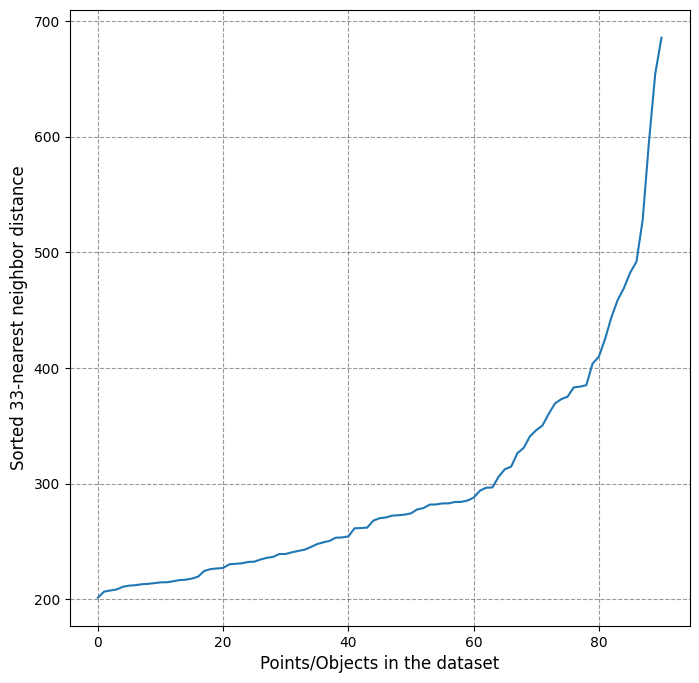

In [204]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(clustering_gpt2)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(clustering_gpt2)

    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * clustering_gpt2.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=clustering_gpt2, k=k)

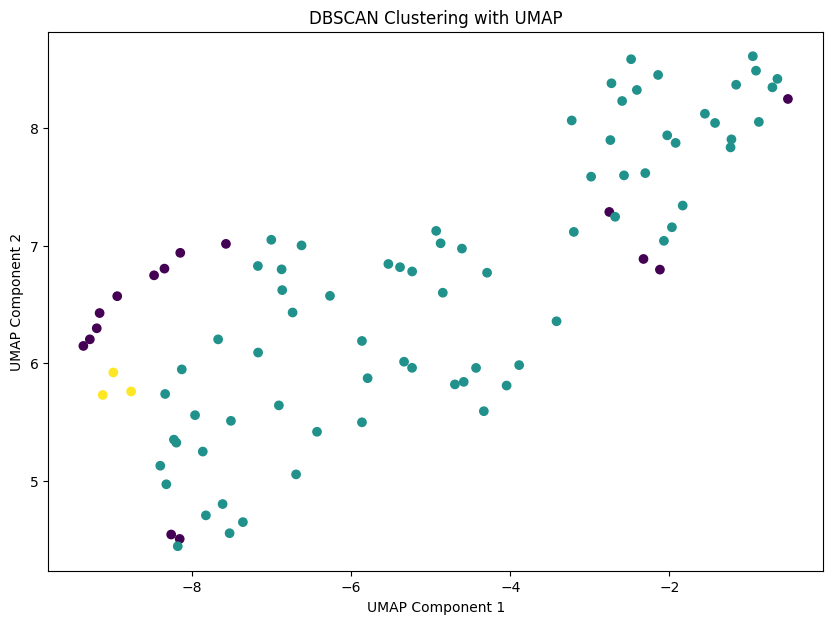

Estimated number of clusters: 2
Estimated number of noise points: 15
Silhouette Score: 0.1534369923843374

Mean values for each DBSCAN cluster (excluding noise):


,Count,Condition,AmountPatientRatio,TimePatientSeconds,TechnicalQuestion,Request,Statement,Differentiate,Exclude,SupportDiagnostics,SupportManagement,FirstQuestionSelf,AmountDiagnosesMentioned,AmountDiagnosesExcluded,DurationInteractionSeconds,AmountInteraction
dbscan_cluster,,,,,,,,,,,,,,,,
0,92.712329,1.0,0.844749,228.876712,0.547945,1.136986,0.808219,0.191781,1.452055,0.027397,0.013699,0.753425,9.643836,0.164384,580.684932,13.698630
1,75.000000,1.0,1.000000,467.333333,1.333333,2.333333,0.666667,0.333333,3.333333,0.333333,1.000000,1.000000,21.000000,0.000000,1000.000000,23.333333


In [209]:
# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_gpt2)
principalDf = pd.DataFrame(data = embedding, columns = ['umap component 1', 'umap component 2'])

# Apply DBSCAN
dbscan = DBSCAN(eps=107, min_samples=3) # default parameter values: 0.5 and 5, then eps and min_samples was tuned --> 100 = 4 clusters und 18 noise points / 104 = 3 clusters und 16 noise points / 107 = 2 clusters und 15 noise points
dbscan_labels = dbscan.fit_predict(clustering_gpt2)

# Visualize the results (using the previously calculated UMAP embedding for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=dbscan_labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('DBSCAN Clustering with UMAP')
plt.show()

# Print the number of clusters found (excluding noise points, labeled as -1)
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# Calculate silhouette score (if there are more than 1 clusters and less than all points are noise)
if n_clusters_ > 1 and n_clusters_ < len(clustering_gpt2):
    silhouette_avg = silhouette_score(clustering_gpt2, dbscan_labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Cannot calculate silhouette score for DBSCAN (needs more than 1 cluster and less than all points as noise).")

# To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:
# Add DBSCAN labels to the dataframe
clustering_gpt2['dbscan_cluster'] = dbscan_labels

# Group the data by cluster and calculate the mean of each feature
df_grouped_dbscan = clustering_gpt2[clustering_gpt2['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean()

print("\nMean values for each DBSCAN cluster (excluding noise):")
df_grouped_dbscan

Human

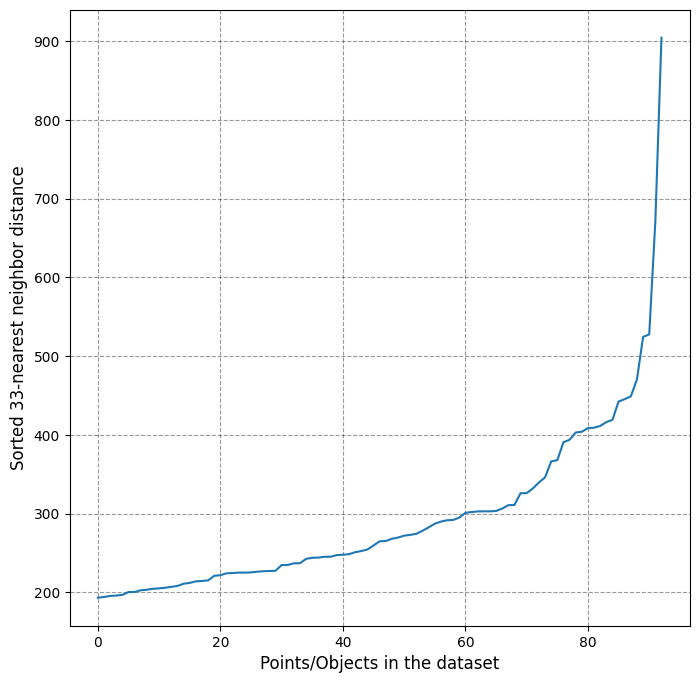

In [211]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(clustering_human2)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(clustering_human2)

    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * clustering_human2.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=clustering_human2, k=k)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


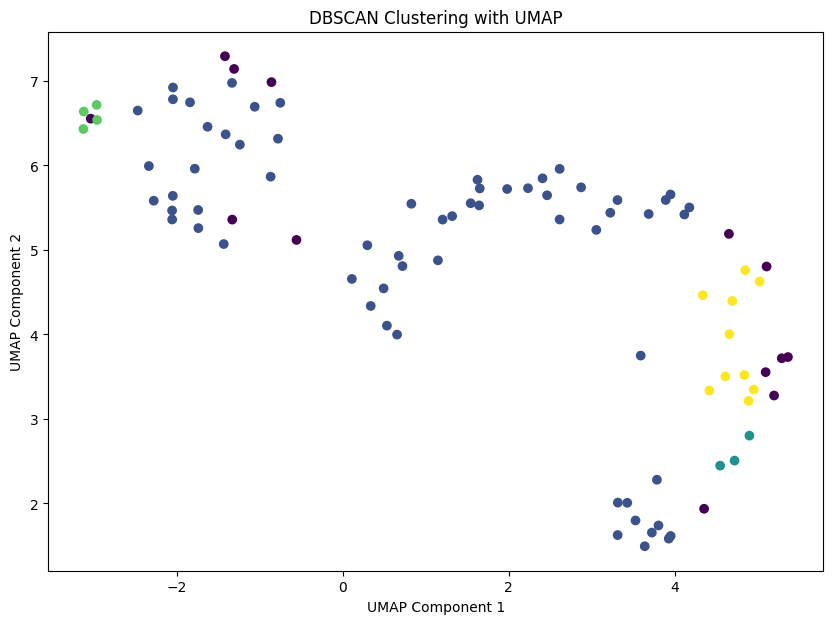

Estimated number of clusters: 4
Estimated number of noise points: 13
Silhouette Score: 0.06541773185910768

Mean values for each DBSCAN cluster (excluding noise):


,Count,Condition,AmountPatientRatio,TimePatientSeconds,TechnicalQuestion,Request,Statement,Differentiate,Exclude,SupportDiagnostics,SupportManagement,FirstQuestionSelf,AmountDiagnosesMentioned,AmountDiagnosesExcluded,DurationInteractionSeconds,AmountInteraction
dbscan_cluster,,,,,,,,,,,,,,,,
0,100.619048,0.0,0.857143,246.460317,0.809524,0.904762,1.571429,0.238095,1.666667,0.031746,0.063492,0.968254,5.095238,0.190476,815.857143,21.904762
1,28.333333,0.0,0.666667,178.333333,0.000000,1.000000,5.000000,0.333333,5.000000,0.000000,0.666667,1.000000,10.333333,1.000000,1254.333333,37.000000
2,110.000000,0.0,0.791667,204.750000,0.000000,0.500000,0.000000,0.000000,1.250000,0.000000,0.000000,1.000000,2.250000,0.000000,382.250000,5.250000
3,106.100000,0.0,0.933333,402.300000,1.100000,0.900000,1.800000,0.300000,1.500000,0.000000,0.000000,1.000000,5.300000,0.200000,1163.400000,26.700000


In [217]:
# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_human2)
principalDf = pd.DataFrame(data = embedding, columns = ['umap component 1', 'umap component 2'])

# Apply DBSCAN
dbscan = DBSCAN(eps=104, min_samples=3) # default parameter values: 0.5 and 5, then eps and min_samples was tuned --> 104 = 4 clusters und 13 noise points / 107 resp 110 = 3 clusters und 13 noise points / 127 = 2 clusters und 10 noise points
dbscan_labels = dbscan.fit_predict(clustering_human2)

# Visualize the results (using the previously calculated UMAP embedding for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=dbscan_labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('DBSCAN Clustering with UMAP')
plt.show()

# Print the number of clusters found (excluding noise points, labeled as -1)
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# Calculate silhouette score (if there are more than 1 clusters and less than all points are noise)
if n_clusters_ > 1 and n_clusters_ < len(clustering_human2):
    silhouette_avg = silhouette_score(clustering_human2, dbscan_labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Cannot calculate silhouette score for DBSCAN (needs more than 1 cluster and less than all points as noise).")

# To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:
# Add DBSCAN labels to the dataframe
clustering_human2['dbscan_cluster'] = dbscan_labels

# Group the data by cluster and calculate the mean of each feature
df_grouped_dbscan = clustering_human2[clustering_human2['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean()

print("\nMean values for each DBSCAN cluster (excluding noise):")
df_grouped_dbscan

### HDBSCAN

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install hdbscan

import hdbscan

# drop a certain column in the dataset
clustering_df2.drop('dbscan_cluster', axis=1, inplace=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


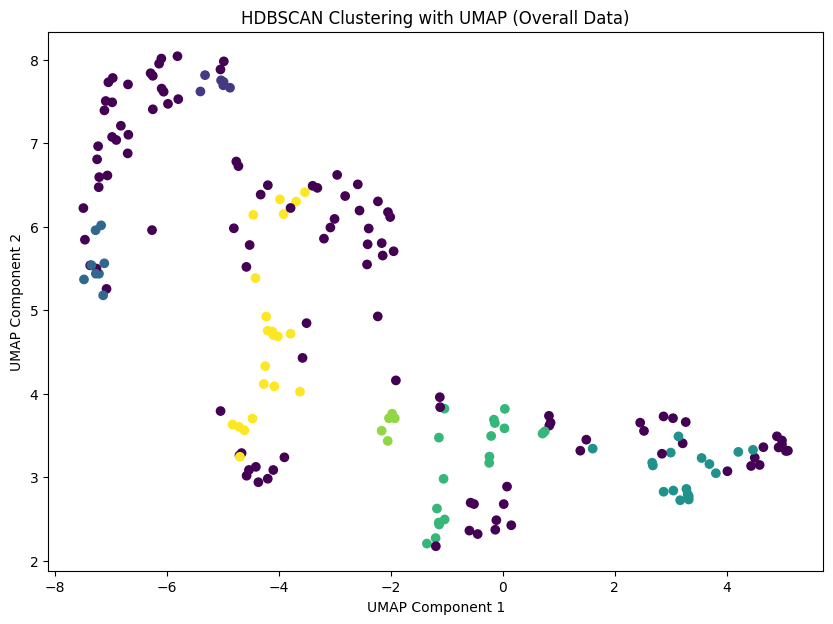

Estimated number of clusters: 6
Estimated number of noise points: 109
Silhouette Score: -0.1864793985419161

Mean values for each HDBSCAN cluster (excluding noise):


/tmp/ipython-input-247-1268921689.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df2['hdbscan_cluster'] = hdbscan_labels


,Condition,AmountPatientRatio,TimePatientSeconds,TechnicalQuestion,Request,Statement,Differentiate,Exclude,SupportDiagnostics,SupportManagement,FirstQuestionSelf,AmountDiagnosesMentioned,AmountDiagnosesExcluded,DurationInteractionSeconds,AmountInteraction,dbscan_cluster
hdbscan_cluster,,,,,,,,,,,,,,,,
0,0.500000,1.000000,472.000000,1.000000,1.666667,1.000000,0.166667,2.333333,0.166667,0.500000,1.000000,12.833333,0.333333,979.500000,20.500000,1.0
1,0.125000,0.833333,183.000000,1.000000,1.375000,2.000000,0.375000,2.875000,0.000000,0.000000,0.875000,9.750000,0.000000,1027.000000,25.750000,0.0
2,0.764706,0.901961,188.470588,0.352941,0.588235,0.058824,0.058824,1.176471,0.000000,0.000000,0.823529,5.058824,0.000000,395.529412,7.000000,0.0
3,0.666667,0.833333,199.388889,0.777778,1.166667,0.777778,0.055556,1.666667,0.000000,0.000000,0.833333,9.055556,0.166667,624.500000,16.111111,0.0
4,0.600000,0.833333,210.600000,0.000000,1.200000,2.200000,0.200000,1.600000,0.400000,0.200000,0.600000,12.200000,0.200000,722.200000,24.000000,0.0
5,0.380952,0.888889,267.619048,0.571429,0.857143,1.857143,0.285714,1.809524,0.000000,0.047619,0.952381,8.190476,0.380952,842.714286,20.190476,0.0


In [247]:
# Apply UMAP to the overall clustering_df2 for dimensionality reduction
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_df2)
principalDf = pd.DataFrame(data = embedding, columns = ['umap component 1', 'umap component 2'])

# Apply HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5) # You can tune min_cluster_size
hdbscan_labels = clusterer.fit_predict(clustering_df2)

# Visualize the results (using the previously calculated UMAP embedding for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=hdbscan_labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('HDBSCAN Clustering with UMAP (Overall Data)')
plt.show()

# Print the number of clusters found (excluding noise points, labeled as -1)
n_clusters_ = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
n_noise_ = list(hdbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# Calculate silhouette score (if there are more than 1 clusters and less than all points are noise)
if n_clusters_ > 1 and n_clusters_ < len(clustering_df2):
    silhouette_avg = silhouette_score(clustering_df2, hdbscan_labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Cannot calculate silhouette score for HDBSCAN (needs more than 1 cluster and less than all points as noise).")

# To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:
# Add HDBSCAN labels to the dataframe
clustering_df2['hdbscan_cluster'] = hdbscan_labels

# Group the data by cluster and calculate the mean of each feature
df_grouped_hdbscan = clustering_df2[clustering_df2['hdbscan_cluster'] != -1].groupby('hdbscan_cluster').mean()

print("\nMean values for each HDBSCAN cluster (excluding noise):")
display(df_grouped_hdbscan)

GPT

In [254]:
# drop a certain column in the dataset
clustering_gpt2.drop('dbscan_cluster', axis=1, inplace=True)

/tmp/ipython-input-254-2723058600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_gpt2.drop('dbscan_cluster', axis=1, inplace=True)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


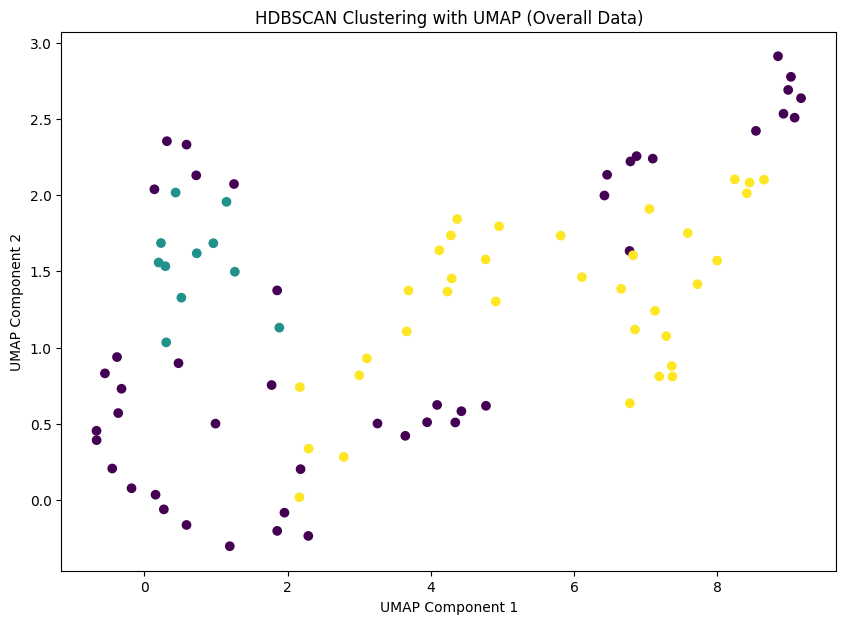

Estimated number of clusters: 2
Estimated number of noise points: 45
Silhouette Score: 0.017467676085638824

Mean values for each HDBSCAN cluster (excluding noise):


/tmp/ipython-input-271-3375355229.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_gpt2['hdbscan_cluster'] = hdbscan_labels


,Condition,AmountPatientRatio,TimePatientSeconds,TechnicalQuestion,Request,Statement,Differentiate,Exclude,SupportDiagnostics,SupportManagement,FirstQuestionSelf,AmountDiagnosesMentioned,AmountDiagnosesExcluded,DurationInteractionSeconds,AmountInteraction
hdbscan_cluster,,,,,,,,,,,,,,,
0,1.0,0.969697,401.636364,0.454545,0.818182,1.727273,0.272727,1.909091,0.090909,0.000000,0.636364,13.0,0.000000,807.272727,16.454545
1,1.0,0.914286,199.428571,0.600000,1.057143,0.514286,0.171429,1.542857,0.000000,0.028571,0.800000,9.8,0.171429,516.257143,12.914286


In [271]:
# Apply UMAP to the overall clustering_gpt2 for dimensionality reduction
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_gpt2)
principalDf = pd.DataFrame(data = embedding, columns = ['umap component 1', 'umap component 2'])

# Apply HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5) # You can tune min_cluster_size / 3 = 6 Clusters and 52 noise points / 4 = 3 Clusters and 66 noise points / 5 = 2 clusters and 45 noise points
hdbscan_labels = clusterer.fit_predict(clustering_gpt2)

# Visualize the results (using the previously calculated UMAP embedding for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=hdbscan_labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('HDBSCAN Clustering with UMAP (Overall Data)')
plt.show()

# Print the number of clusters found (excluding noise points, labeled as -1)
n_clusters_ = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
n_noise_ = list(hdbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# Calculate silhouette score (if there are more than 1 clusters and less than all points are noise)
if n_clusters_ > 1 and n_clusters_ < len(clustering_gpt2):
    silhouette_avg = silhouette_score(clustering_gpt2, hdbscan_labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Cannot calculate silhouette score for HDBSCAN (needs more than 1 cluster and less than all points as noise).")

# To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:
# Add HDBSCAN labels to the dataframe
clustering_gpt2['hdbscan_cluster'] = hdbscan_labels

# Group the data by cluster and calculate the mean of each feature
df_grouped_hdbscan = clustering_gpt2[clustering_gpt2['hdbscan_cluster'] != -1].groupby('hdbscan_cluster').mean()

print("\nMean values for each HDBSCAN cluster (excluding noise):")
display(df_grouped_hdbscan)

Human

In [262]:
# drop a certain column in the dataset
clustering_human2.drop('dbscan_cluster', axis=1, inplace=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


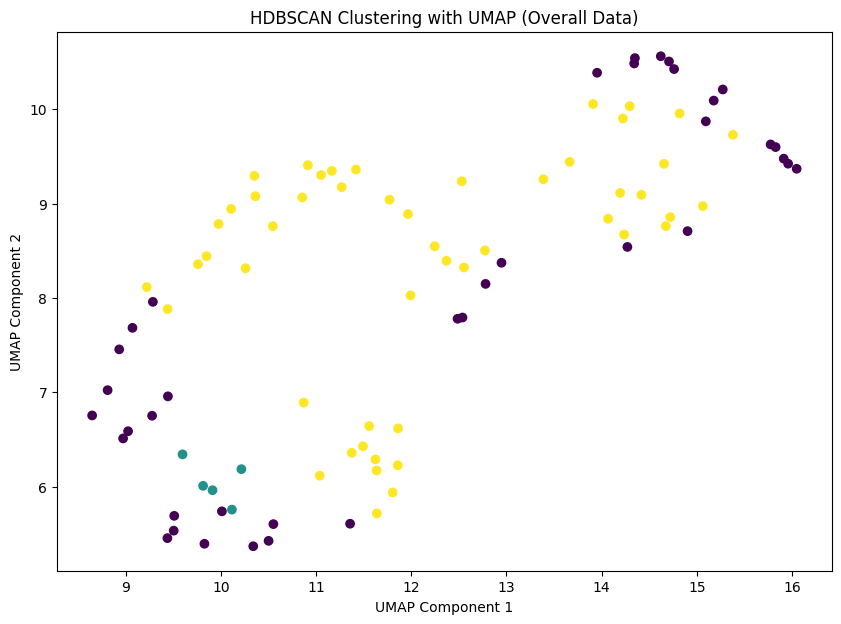

Estimated number of clusters: 2
Estimated number of noise points: 38
Silhouette Score: 0.013375109882366428

Mean values for each HDBSCAN cluster (excluding noise):


/tmp/ipython-input-269-1458622853.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_human2['hdbscan_cluster'] = hdbscan_labels


,Condition,AmountPatientRatio,TimePatientSeconds,TechnicalQuestion,Request,Statement,Differentiate,Exclude,SupportDiagnostics,SupportManagement,FirstQuestionSelf,AmountDiagnosesMentioned,AmountDiagnosesExcluded,DurationInteractionSeconds,AmountInteraction
hdbscan_cluster,,,,,,,,,,,,,,,
0,0.0,0.866667,336.6,1.60,1.0,1.0,0.40,1.40,0.00,0.00,1.00,4.60,0.2,1162.80,29.80
1,0.0,0.880000,239.2,0.78,1.0,1.8,0.28,1.78,0.04,0.08,0.96,5.34,0.2,833.56,21.62


In [269]:
# Apply UMAP to the overall clustering_human2 for dimensionality reduction
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(clustering_human2)
principalDf = pd.DataFrame(data = embedding, columns = ['umap component 1', 'umap component 2'])

# Apply HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5) # You can tune min_cluster_size / 3 = 6 clusters and 31 noise points / 4 = 4 Clusters and 46 noise points / 5 = 2 clusters and 38 noise points
hdbscan_labels = clusterer.fit_predict(clustering_human2)

# Visualize the results (using the previously calculated UMAP embedding for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(principalDf['umap component 1'], principalDf['umap component 2'], c=hdbscan_labels, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('HDBSCAN Clustering with UMAP (Overall Data)')
plt.show()

# Print the number of clusters found (excluding noise points, labeled as -1)
n_clusters_ = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
n_noise_ = list(hdbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# Calculate silhouette score (if there are more than 1 clusters and less than all points are noise)
if n_clusters_ > 1 and n_clusters_ < len(clustering_human2):
    silhouette_avg = silhouette_score(clustering_human2, hdbscan_labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Cannot calculate silhouette score for HDBSCAN (needs more than 1 cluster and less than all points as noise).")

# To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster:
# Add HDBSCAN labels to the dataframe
clustering_human2['hdbscan_cluster'] = hdbscan_labels

# Group the data by cluster and calculate the mean of each feature
df_grouped_hdbscan = clustering_human2[clustering_human2['hdbscan_cluster'] != -1].groupby('hdbscan_cluster').mean()

print("\nMean values for each HDBSCAN cluster (excluding noise):")
display(df_grouped_hdbscan)

# Task
Replace PCA with UMAP in the code and update the visualizations and interpretations accordingly.

## Install umap

### Subtask:
Install the `umap-learn` library.


**Reasoning**:
Install the `umap-learn` library using pip.



In [313]:
print("WCSS (Inertia) scores for each number of clusters (1-10):")
print(wcss)

# Calculate explained variance ratio for PCA
# Assuming 'pca' object from the previous PCA step is available
if 'pca' in globals():
    explained_variance_ratio = pca.explained_variance_ratio_
    print("\nExplained Variance Ratio for Principal Components:")
    print(f"Principal Component 1: {explained_variance_ratio[0]:.4f}")
    print(f"Principal Component 2: {explained_variance_ratio[1]:.4f}")
else:
    print("\nPCA was not performed. Cannot calculate explained variance ratio for principal components.")

WCSS (Inertia) scores for each number of clusters (1-10):
[21462483.98294082, 10292139.554484524, 7163556.217106992, 6037673.330203469, 4911084.946961443, 4540882.175205293, 3713426.356102808, 3266024.145879654, 2814965.6681482173, 2520507.404759596]

Explained Variance Ratio for Principal Components:
Principal Component 1: 0.8188
Principal Component 2: 0.1461
